In [1]:
import os, sys, pathlib, zipfile
import functools
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

import lal, lalsimulation as ls
import pycbc.waveform as wf
import spherical
import sxs

import nrcatalogtools
from nrcatalogtools.rit import RITCatalog
from nrcatalogtools.sxs import SXSCatalog
from nrcatalogtools.maya import MayaCatalog

No version information file '.version' found


## DEVELOP

Tasks:

What we need is the machinery to (A) index, (B) fetch, and (C) convert to 
SXS format for each of the BAM and GATECH catalogs. In order to do so, 
 - we first need a catalog class that does (A),
   - should be able to cache data in a subdirectory of `$HOME`
 - we also need a `load()` method that does (B) and (C).
   - should be able to download the catalog OR individual simulation data
   - should be able to fetch from cache also. And only download if not
     available locally.
     



### Catalog

In [2]:
gc = MayaCatalog.load(verbosity=10, download=True)

Skipping download from 'https://cgpstorage.ph.utexas.edu/MAYAmetadata.pkl' because local file is newer
Going to open /home/prayush/.cache/MAYA/catalog.zip as a ZIP archive
Going to extract catalog.pkl from the ZIP with filelist=[<ZipInfo filename='catalog.pkl' compress_type=bzip2 filemode='-rw-rw-r--' file_size=131227 compress_size=89916>]


In [3]:
gc.metadata_filepath_from_simname("GT0001")

'/home/prayush/.cache/MAYA/metadata/GT0001.txt'

In [6]:
gc.metadata_filepath_from_simname("MAYA1070")

'/home/prayush/.cache/MAYA/metadata/MAYA1070.txt'

In [10]:
gc.download_waveform_data("MAYA1070")

...writing to cache: /home/prayush/.cache/MAYA/data/MAYA1070.h5
...downloading https://cgpstorage.ph.utexas.edu//maya_format/MAYA1070.h5
...exporting to LVCNR catalog format


/home/prayush/miniconda3/envs/enigma_spins_v2023/lib/python3.10/site-packages/mayawaves/radiation.py:111: UserWarning: Using data extrapolated from 75.0M for radius extrapolation. You can set this manually by setting radius_for_extrapolation
  warnings.warn(


Storing (l, m)=(2, -2)
Storing (l, m)=(2, -1)
Storing (l, m)=(2, 0)
Storing (l, m)=(2, 1)
Storing (l, m)=(2, 2)
Storing (l, m)=(3, -3)
Storing (l, m)=(3, -2)
Storing (l, m)=(3, -1)
Storing (l, m)=(3, 0)
Storing (l, m)=(3, 1)
Storing (l, m)=(3, 2)
Storing (l, m)=(3, 3)
Storing (l, m)=(4, -4)
Storing (l, m)=(4, -3)
Storing (l, m)=(4, -2)
Storing (l, m)=(4, -1)
Storing (l, m)=(4, 0)
Storing (l, m)=(4, 1)
Storing (l, m)=(4, 2)
Storing (l, m)=(4, 3)
Storing (l, m)=(4, 4)
Storing (l, m)=(5, -5)
Storing (l, m)=(5, -4)
Storing (l, m)=(5, -3)
Storing (l, m)=(5, -2)
Storing (l, m)=(5, -1)
Storing (l, m)=(5, 0)
Storing (l, m)=(5, 1)
Storing (l, m)=(5, 2)
Storing (l, m)=(5, 3)
Storing (l, m)=(5, 4)
Storing (l, m)=(5, 5)
Storing (l, m)=(6, -6)
Storing (l, m)=(6, -5)
Storing (l, m)=(6, -4)
Storing (l, m)=(6, -3)
Storing (l, m)=(6, -2)
Storing (l, m)=(6, -1)
Storing (l, m)=(6, 0)
Storing (l, m)=(6, 1)
Storing (l, m)=(6, 2)
Storing (l, m)=(6, 3)
Storing (l, m)=(6, 4)
Storing (l, m)=(6, 5)
Storing (l, 

/home/prayush/miniconda3/envs/enigma_spins_v2023/lib/python3.10/site-packages/mayawaves/coalescence.py:218: RuntimeWarning: invalid value encountered in divide
  nhat = separation_vector / np.linalg.norm(separation_vector, axis=1).reshape(separation_vector.shape[0], 1)
/home/prayush/miniconda3/envs/enigma_spins_v2023/lib/python3.10/site-packages/mayawaves/coalescence.py:190: RuntimeWarning: invalid value encountered in divide
  nhat = separation_vector / np.linalg.norm(separation_vector, axis=1).reshape(separation_vector.shape[0], 1)
/home/prayush/miniconda3/envs/enigma_spins_v2023/lib/python3.10/site-packages/mayawaves/coalescence.py:195: RuntimeWarning: invalid value encountered in divide
  orbital_angular_momentum_unit_vector = orbital_frequency / mag_orbital_frequency.reshape(
/home/prayush/miniconda3/envs/enigma_spins_v2023/lib/python3.10/site-packages/mayawaves/coalescence.py:532: RuntimeWarning: invalid value encountered in divide
  nhat = separation_vector / np.linalg.norm(sepa

Storing mass1-vs-time
Storing spin1x-vs-time
Storing spin1y-vs-time
Storing spin1z-vs-time
Storing position1x-vs-time
Storing position1y-vs-time
Storing position1z-vs-time
Storing mass2-vs-time
Storing spin2x-vs-time
Storing spin2y-vs-time
Storing spin2z-vs-time
Storing position2x-vs-time
Storing position2y-vs-time
Storing position2z-vs-time
Storing LNhatx-vs-time
Storing LNhaty-vs-time
Storing LNhatz-vs-time
Storing Omega-vs-time
Storing remnant-mass-vs-time
Storing remnant-spinx-vs-time
Storing remnant-spiny-vs-time
Storing remnant-spinz-vs-time
Storing remnant-positionx-vs-time
Storing remnant-positiony-vs-time
Storing remnant-positionz-vs-time
...removing maya format file
...renaming LVCNR format file in the cache


In [11]:
gc.simulations_dataframe

simulation_name                                             GT_Tag  \
GT0001            GT0001                           fr_b3.1_a0.4_oth.000_M77   
GT0002            GT0002                           fr_b3.1_a0.4_oth.045_M77   
GT0003            GT0003                           fr_b3.1_a0.4_oth.090_M77   
GT0004            GT0004                           fr_b3.1_a0.4_oth.135_M77   
GT0005            GT0005                           fr_b3.1_a0.4_oth.180_M77   
...                  ...                                                ...   
MAYA1083        MAYA1083  D11_q3_a1_0.2912_0.542_-0.459_a2_0.5474_0.5817...   
MAYA1084        MAYA1084  D11_q4.077231303077062_a1_-0.8794280912999978_...   
MAYA1085        MAYA1085  D11_q4.42_a1_-0.3715_-0.1253_-0.6941_a2_-0.011...   
MAYA1086        MAYA1086  D11_q4.96_a1_-0.4237_0.0545_-0.5922_a2_0.0517_...   
MAYA1087        MAYA1087  D11_q5_a1_-0.362_-0.0548_-0.64_a2_-0.0013_0.00...   

                m1        m2    m1_irr    m2_irr         q       eta  \
GT0001    0.500073  0.499927  0.489531  0.489375  1.000292      0.25   
GT0002    0.500053  0.499947   0.48951  0.489396  1.000212      0.25   
GT0003         0.5       0.5  0.489453  0.489453       1.0      0.25   
GT0004    0.499939  0.500061  0.489388  0.489518  0.999756      0.25   
GT0005    0.499911  0.500089  0.489358  0.489548  0.999644      0.25   
...            ...       ...       ...       ...       ...       ...   
MAYA1083  0.746735  0.248469  0.674709  0.221323   3.00534  0.187333   
MAYA1084  0.793266  0.196258  0.669218  0.179819   4.04195  0.158999   
MAYA1085  0.811035  0.184503  0.723589  0.184448  4.395789  0.150983   
MAYA1086  0.829489  0.167777  0.759803  0.164651  4.944007  0.139933   
MAYA1087  0.830451  0.166668  0.758833  0.166521  4.982675   0.13921   

               a1x       a1y  ... separation eccentricity mean_anomaly  \
GT0001        -0.0       0.0  ...        6.2     0.034971         -1.0   
GT0002    0.282784       0.0  ...        6.2      0.03225         -1.0   
GT0003    0.400002       0.0  ...        6.2     0.015002         -1.0   
GT0004    0.282913       0.0  ...        6.2     0.013542         -1.0   
GT0005        -0.0      -0.0  ...        6.2     0.015673         -1.0   
...            ...       ...  ...        ...          ...          ...   
MAYA1083  0.293759  0.546728  ...  10.999909     0.006403     3.629031   
MAYA1084 -0.901228  0.079698  ...   11.00017     0.005251     4.483083   
MAYA1085 -0.375598  -0.12668  ...  11.000009     0.004597     4.573293   
MAYA1086 -0.426479  0.054858  ...  10.999915     0.007252     4.476518   
MAYA1087 -0.364511 -0.055181  ...  10.999942     0.006025     4.341883   

           merge_time maya_file_size__GB_ lvcnr_file_size__GB_  \
GT0001       202.1975            0.033804             0.001397   
GT0002     191.237708            0.033804             0.001388   
GT0003     170.409583            0.033804             0.001456   
GT0004     151.738542            0.033804             0.001425   
GT0005        145.855            0.033804              0.00145   
...               ...                 ...                  ...   
MAYA1083  1327.983854            1.396266              0.00837   
MAYA1084  2161.666667            2.451664             0.009744   
MAYA1085  1307.117708            1.687236              0.00783   
MAYA1086    1418.9475            2.180354             0.009591   
MAYA1087  1415.315625            2.134539             0.009662   

                                        metadata_location  \
GT0001      /home/prayush/.cache/MAYA/metadata/GT0001.txt   
GT0002      /home/prayush/.cache/MAYA/metadata/GT0002.txt   
GT0003      /home/prayush/.cache/MAYA/metadata/GT0003.txt   
GT0004      /home/prayush/.cache/MAYA/metadata/GT0004.txt   
GT0005      /home/prayush/.cache/MAYA/metadata/GT0005.txt   
...                                                   ...   
MAYA1083  /home/prayush/.cache/MAYA/metadata/MAYA1083.txt   
MAYA1084  /home/prayush/.

In [12]:
gc.get_metadata("GT0003")

Metadata([('GTID', 'GT0003'),
          ('GT_Tag', 'fr_b3.1_a0.4_oth.090_M77'),
          ('m1', 0.5),
          ('m2', 0.5),
          ('m1_irr', 0.48945302828157217),
          ('m2_irr', 0.48945302868389595),
          ('q', 1.0),
          ('eta', 0.25),
          ('a1x', 0.40000230007657644),
          ('a1y', 2.08965731124981e-15),
          ('a1z', -8.68970079270579e-08),
          ('a2x', -0.40000229285746847),
          ('a2y', -2.0922581715463596e-15),
          ('a2z', 9.888128211458082e-08),
          ('f_lower_at_1MSUN', 3865.021025947972),
          ('omega_orbital', 0.023063793009011686),
          ('separation', 6.2),
          ('eccentricity', 0.01500179723278885),
          ('mean_anomaly', -1.0),
          ('merge_time', 170.4095833),
          ('maya_file_size__GB_', 0.0338040366768837),
          ('lvcnr_file_size__GB_', 0.001455516554415226),
          ('metadata_location',
           '/home/prayush/.cache/MAYA/metadata/GT0003.txt'),
          ('metadata_link',
  

In [13]:
gwm = gc.get("GT0003")

In [14]:
gwm

WaveformModes([[ 9.31243930e-02-2.20475375e-03j, -6.24884045e-08+1.06408226e-08j,
         0.00000000e+00+0.00000000e+00j, ...,
         6.24751760e-06-1.62354562e-06j, -2.84669615e-08-4.12664832e-08j,
         1.04873122e-04+2.97600263e-05j],
       [ 9.47771479e-02+3.55331561e-05j, -6.20108965e-08+1.24090740e-08j,
         0.00000000e+00+0.00000000e+00j, ...,
         5.25494716e-06-1.62965973e-06j, -4.14087258e-08-4.37086452e-08j,
         1.08359952e-04+2.29577657e-05j],
       [ 9.63800371e-02+2.35647402e-03j, -6.51673338e-08+1.35575185e-08j,
         0.00000000e+00+0.00000000e+00j, ...,
         3.62647213e-06-1.51538698e-06j, -5.87138507e-08-3.80475283e-08j,
         1.11324859e-04+1.59140358e-05j],
       ...,
       [ 4.60589927e-08+1.85080096e-21j,  8.00444841e-09-2.37302729e-22j,
         0.00000000e+00+0.00000000e+00j, ...,
        -2.09771063e-09-1.31068623e-23j,  9.75251155e-10-2.96776233e-22j,
        -7.78127862e-10-9.53220783e-24j],
       [ 2.52103198e-08+1.01303310e-

In [15]:
gwmp = gwm.to_pycbc()
gwmp

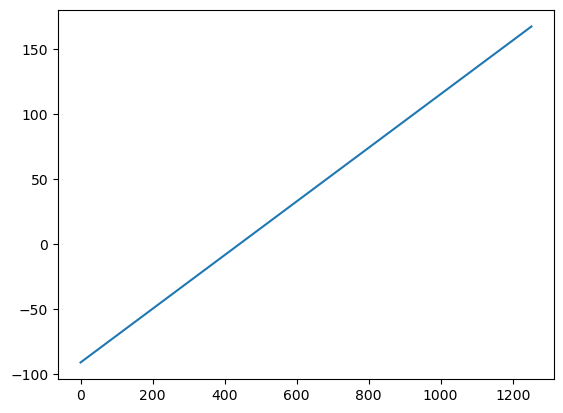

In [16]:
plt.plot(gwm.time)

In [29]:
hlm = gwm.get_mode(2, 2, 1, to_pycbc=False)
hlmdot = gwm.dot.get_mode(2, 2, 1, to_pycbc=False)

/home/prayush/miniconda3/envs/enigma_spins_v2023/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


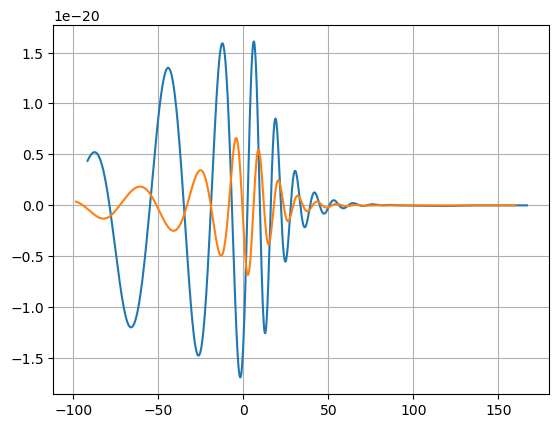

In [39]:
plt.plot(hlm.time, hlm)
plt.plot(hlmdot.time, hlmdot)
plt.grid()

In [40]:
gwm.get_mode(2, 2, 1).data

array([4.36853185e-21-1.13236488e-22j, 4.44285412e-21-2.23575077e-22j,
       4.51474096e-21-3.37763529e-22j, ...,
       2.64898602e-27-1.25267100e-40j, 1.94258975e-27-5.04537487e-41j,
       1.06327355e-27-3.51707959e-41j])

In [35]:
pols = gwm.get_polarizations(0, 0)

Computing reference time..
Reference time not found in waveform h5 file.
Reference time not found in simulation metadata file.
Reference time should be computed fromthe reference orbital frequency!
Reference orbital phase not found in simulation metadata.Proceeding to retrieve from the h5 file.. 'Omega'
/home/prayush/miniconda3/envs/enigma_spins_v2023/lib/python3.10/site-packages/waveformtools
No module named 'config'


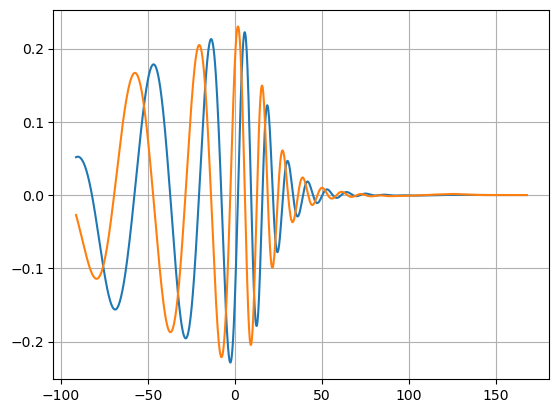

In [42]:
plt.plot(pols.time, pols.real)
plt.plot(pols.time, pols.imag)
plt.grid()

In [47]:
nrcatalogtools.utils.amp_to_physical(1, 1)

4.7854158415878413e-20

In [48]:
nrcatalogtools.utils.time_to_physical(1)

4.925490947641267e-06

In [49]:
pols *= nrcatalogtools.utils.amp_to_physical(1, 1)
pols.time *= nrcatalogtools.utils.time_to_physical(1)

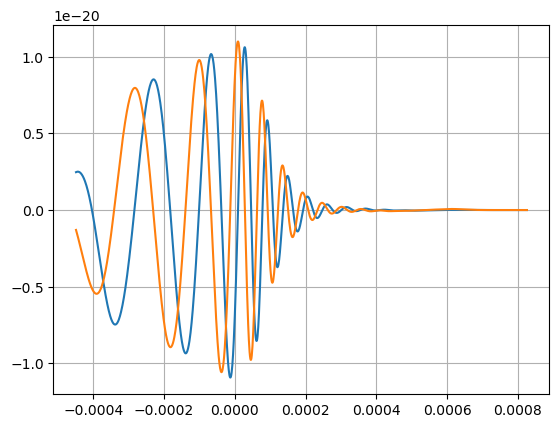

In [50]:
plt.plot(pols.time, pols.real)
plt.plot(pols.time, pols.imag)
plt.grid()

In [124]:
hlm = get_physical_mode(gwm, 2, 2, 30, 1, 1.0 / 4096)

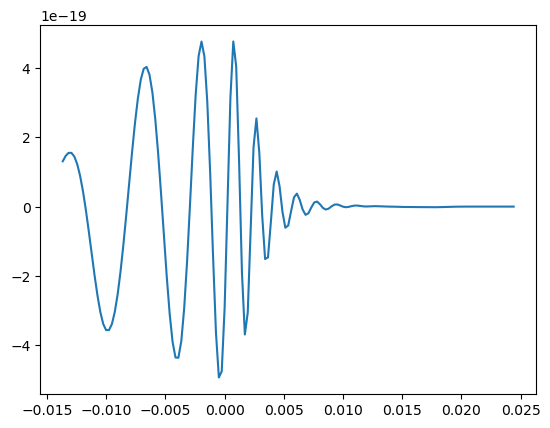

In [125]:
plt.plot(hlm.sample_times, hlm.real())

In [102]:
hlm = hlm[:, 1] + 1j * hlm[:, 2]

In [107]:
np.argmax(np.abs(hlm))

444

In [44]:
gwm.get_angles(inclination=1, coa_phase=1, f_ref=None, t_ref=None)

{'theta': 0.9999999999999999,
 'psi': 0.23344088005095726,
 'alpha': 3.141592653589793,
 't_ref': -1,
 'f_ref': None}

In [92]:
xx = gwm.interpolate([-50, 0, 1, 2, 3, 4, 5]) * 1e-19

In [96]:
type(xx)

nrcatalogtools.waveform.WaveformModes

In [8]:
rc = RITCatalog(verbosity=5, download=True)

..Going to read catalog file from cache.


In [9]:
rc = RITCatalog(verbosity=5, download=True)

In [10]:
rc.simulations

{'RIT:BBH:0001-n100-id3': Metadata([('Unnamed__0', 0),
           ('catalog_tag', 'RIT:BBH:0001'),
           ('resolution_tag', 'n100'),
           ('id_tag', 'id3'),
           ('run_name', 'U0_D9.53_q1.00_a0.0_n100'),
           ('data_type', 'NR'),
           ('system_type', 'Nonspinning'),
           ('comments', 'none'),
           ('authors_emails',
            'James Healy <jchsma@rit.edu>, Carlos Lousto <colsma@rit.edu>'),
           ('simulation_bibtex_keys', 'Healy:2014yta, Healy:2016lce'),
           ('code_bibtex_keys', 'Campanelli:2005dd'),
           ('initial_data_bibtex_keys',
            'Bowen:1980yu, Brandt:1997tf, Ansorg:2004ds'),
           ('quasicircular_bibtex_keys', 'Husa:2007rh, Buonanno:2010yk'),
           ('eccentricity_bibtex_keys', 'Campanelli:2008nk'),
           ('extrapolation_bibtex_keys', 'Nakano:2015pta'),
           ('code', 'LazEv'),
           ('evolution_system', 'BSSN'),
           ('evolution_gauge', '1+log/Gamma-driver(eta'),
           ('cf

In [11]:
rc.get_metadata("RIT:BBH:0001-n100-id3")

Metadata([('Unnamed__0', 0),
          ('catalog_tag', 'RIT:BBH:0001'),
          ('resolution_tag', 'n100'),
          ('id_tag', 'id3'),
          ('run_name', 'U0_D9.53_q1.00_a0.0_n100'),
          ('data_type', 'NR'),
          ('system_type', 'Nonspinning'),
          ('comments', 'none'),
          ('authors_emails',
           'James Healy <jchsma@rit.edu>, Carlos Lousto <colsma@rit.edu>'),
          ('simulation_bibtex_keys', 'Healy:2014yta, Healy:2016lce'),
          ('code_bibtex_keys', 'Campanelli:2005dd'),
          ('initial_data_bibtex_keys',
           'Bowen:1980yu, Brandt:1997tf, Ansorg:2004ds'),
          ('quasicircular_bibtex_keys', 'Husa:2007rh, Buonanno:2010yk'),
          ('eccentricity_bibtex_keys', 'Campanelli:2008nk'),
          ('extrapolation_bibtex_keys', 'Nakano:2015pta'),
          ('code', 'LazEv'),
          ('evolution_system', 'BSSN'),
          ('evolution_gauge', '1+log/Gamma-driver(eta'),
          ('cfl', 0.25),
          ('fd_order', 8.0),
      

In [12]:
rc.get_metadata("RIT:BBH:0001-n100-id3")["waveform_data_location"]

'/home/prayush/.cache/RIT/data/ExtrapStrain_RIT-BBH-0001-n100.h5'

In [13]:
rc.metadata_filepath_from_simname("RIT:BBH:0001-n100-id3")

'/home/prayush/.cache/RIT/metadata/RIT:BBH:0001-n100-id3_Metadata.txt'

In [2]:
sx = SXSCatalog.load(download=True)
raise

/home/prayush/miniconda3/envs/lalsuite-dev-sxs/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
STEP 1 7.343292236328125e-05 secs
STEP 2 6.4849853515625e-05 secs


/home/prayush/miniconda3/envs/lalsuite-dev-sxs/lib/python3.10/zipfile.py:1517: UserWarning: Duplicate name: 'catalog.json'
  return self._open_to_write(zinfo, force_zip64=force_zip64)


STEP 3 4.642822742462158 secs
ADDING TOOK 4.643030643463135 SECONDs


RuntimeError: No active exception to reraise

In [ ]:
sx = SXSCatalog.load(download=True)
raise

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
STEP 1 7.557868957519531e-05 secs


100%|██████████| 2028/2028 [00:00<00:00, 54727.67it/s]

STEP 2 0.039227962493896484 secs
ADDING TOOK 0.0393218994140625 SECONDs


RuntimeError: No active exception to reraise

In [ ]:
sx = SXSCatalog.load(download=True)
raise

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
STEP 1 8.106231689453125e-05 secs


100%|██████████| 2028/2028 [01:26<00:00, 23.53it/s]


STEP 2 86.17741012573242 secs
ADDING TOOK 86.17751097679138 SECONDs


RuntimeError: No active exception to reraise

In [ ]:
sx = SXSCatalog.load(download=True)
raise

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
STEP 1 8.940696716308594e-05 secs


100%|██████████| 2028/2028 [01:27<00:00, 23.25it/s]


STEP 2 87.21240448951721 secs
ADDING TOOK 87.21251463890076 SECONDs


RuntimeError: No active exception to reraise

In [ ]:
sx = SXSCatalog.load(download=True)

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
STEP 1 7.939338684082031e-05 secs


100%|██████████| 2028/2028 [00:00<00:00, 127991.34it/s]

STEP 2 0.017972230911254883 secs
ADDING TOOK 0.018070459365844727 SECONDs


In [ ]:
sx = SXSCatalog.load(download=True)

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
STEP 1 7.390975952148438e-05 secs


100%|██████████| 2028/2028 [02:50<00:00, 11.92it/s]

STEP 2 170.0700626373291 secs
ADDING TOOK 170.07016038894653 SECONDs


In [15]:
sx.get_metadata("SXS:BBH:0043")

Metadata([('url', 'https://doi.org/10.5281/zenodo.1212763'),
          ('simulation_name', 'd12.0_q3_s0.25_0_0.433_s0_0_0/Lev4'),
          ('alternative_names', 'SXS:BBH:0043'),
          ('initial_data_type', 'BBH_CFMS'),
          ('object_types', 'BHBH'),
          ('number_of_orbits', 14.4618232647),
          ('reference_mass_ratio', 3.001284682220411),
          ('reference_chi_eff', 0.3243017031709611),
          ('reference_chi1_perp', 0.2500426429101382),
          ('reference_chi2_perp', 1.7660643079730434e-08),
          ('reference_eccentricity', '<9.4e-05'),
          ('reference_dimensionless_spin1',
           [0.246991814286, 0.037306047218, 0.432499750375]),
          ('reference_dimensionless_spin2',
           [-3.66177128195e-09, -1.57506046992e-08, 1.04703860902e-06]),
          ('reference_orbital_frequency',
           [0.000102397724337, -0.000647388369622, 0.0217347515559]),
          ('reference_mass1', 0.75032331729),
          ('reference_mass2', 0.25000071

In [ ]:
sx.simulations_dataframe.columns

Index(['object_types', 'initial_separation', 'initial_orbital_frequency',
       'initial_adot', 'initial_ADM_energy', 'initial_ADM_linear_momentum',
       'initial_ADM_linear_momentum_mag', 'initial_ADM_angular_momentum',
       'initial_ADM_angular_momentum_mag', 'initial_mass1', 'initial_mass2',
       'initial_mass_ratio', 'initial_dimensionless_spin1',
       'initial_dimensionless_spin1_mag', 'initial_dimensionless_spin2',
       'initial_dimensionless_spin2_mag', 'initial_position1',
       'initial_position2', 'com_correction_space_translation',
       'com_correction_space_translation_mag', 'com_correction_boost_velocity',
       'com_correction_boost_velocity_mag', 'reference_time',
       'reference_separation', 'reference_orbital_frequency_mag',
       'reference_mass_ratio', 'reference_chi1_mag', 'reference_chi2_mag',
       'reference_chi_eff', 'reference_chi1_perp', 'reference_chi2_perp',
       'reference_eccentricity', 'reference_eccentricity_bound',
       'reference

In [ ]:
sx.metadata_filepath_from_simname("SXS:BBH:0004")

'/home/prayush/.cache/sxs/SXS:BBH:0004v5/Lev6/metadata.json'

In [ ]:
sx.waveform_filepath_from_simname("SXS:BBH:0004")

'/home/prayush/.cache/sxs/SXS:BBH:0004v2/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5'

### WaveformModes

In [21]:
rc = RITCatalog.load(verbosity=5, download=True)

In [22]:
gc = MayaCatalog.load(verbosity=5, download=True)

In [23]:
sc = SXSCatalog.load(download=True)

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer


In [5]:
gc.simulations_dataframe

simulation_name                                 GT_Tag    q     a1x  \
GT0001          GT0001               fr_b3.1_a0.4_oth.000_M77  1.0     0.0   
GT0002          GT0002               fr_b3.1_a0.4_oth.045_M77  1.0  0.2828   
GT0003          GT0003               fr_b3.1_a0.4_oth.090_M77  1.0     0.4   
GT0004          GT0004               fr_b3.1_a0.4_oth.135_M77  1.0  0.2829   
GT0005          GT0005               fr_b3.1_a0.4_oth.180_M77  1.0     0.0   
...                ...                                    ...  ...     ...   
GT0895          GT0895  D9_q2.0_a0.6_0.6_th315_r100_res140_CE  2.0  0.5127   
GT0896          GT0896   D9_q2.0_a0.6_0.6_th45_r100_res140_CE  2.0 -0.5127   
GT0897          GT0897   D9_q2.0_a0.6_0.6_th90_r100_res140_CE  2.0  0.5012   
GT0898          GT0898                GW15_D12_q1.2_a0.0_m140  1.2     0.0   
GT0900          GT0900          q1.2_a0.4x_0.4x_GW15_D11_m140  1.2  0.4001   

           a1y     a1z     a2x     a2y     a2z      af      mf   Momega  \
GT0001     0.0  0.3999 -0.4001     0.0     0.0     NaN     NaN  0.09132   
GT0002     0.0  0.2828 -0.4001     0.0     0.0     NaN     NaN  0.09993   
GT0003     0.0    -0.0    -0.4     0.0     0.0     NaN     NaN  0.14025   
GT0004     0.0 -0.2829 -0.3999     0.0     0.0     NaN     NaN  0.35815   
GT0005     0.0 -0.4001 -0.3999     0.0     0.0     NaN     NaN  0.41468   
...        ...     ...     ...     ...     ...     ...     ...      ...   
GT0895 -0.0092  0.3143  0.5664  0.0251 -0.2001  0.7541  0.9531  0.03488   
GT0896  0.0092  0.3143 -0.5664 -0.0251 -0.2001  0.7541  0.9531  0.03484   
GT0897 -0.3249 -0.0697 -0.1884 -0.5576  0.1226  0.6662  0.9593  0.03561   
GT0898     0.0     0.0     0.0     0.0     0.0  0.6817  0.9523  0.02206   
GT0900     0.0     0.0  0.4001     0.0     0.0  0.7034  0.9506  0.02514   

                                    metadata_location  \
GT0001  /home/prayush/.cache/MAYA/metadata/GT0001.txt   
GT0002  /home/prayush/.cache/MAYA/metadata/GT0002.txt   
GT0003  /home/prayush/.cache/MAYA/metadata/GT0003.txt   
GT0004  /home/prayush/.cache/MAYA/metadata/GT0004.txt   
GT0005  /home/prayush/.cache/MAYA/metadata/GT0005.txt   
...                                               ...   
GT0895  /home/prayush/.cache/MAYA/metadata/GT0895.txt   
GT0896  /home/prayush/.cache/MAYA/metadata/GT0896.txt   
GT0897  /home/prayush/.cache/MAYA/metadata/GT0897.txt   
GT0898  /home/prayush/.cache/MAYA/metadata/GT0898.txt   
GT0900  /home/prayush/.cache/MAYA/metadata/GT0900.txt   

                                            metadata_link  \
GT0001  https://raw.githubusercontent.com/cevans216/gt...   
GT0002  https://raw.githubusercontent.com/cevans216/gt...   
GT0003  https://raw.githubusercontent.com/cevans216/gt...   
GT0004  https://raw.githubusercontent.com/cevans216/gt...   
GT0005  https://raw.githubusercontent.com/cevans216/gt...   
...                                                   ...   
GT0895  https://raw.githubusercontent.com/cevans216/gt...   
GT0896  https://raw.githubusercontent.com/cevans216/gt...   
GT0897  https://raw.githubusercontent.com/cevans216/gt...   
GT0898  https://raw.githubusercontent.com/cevans216/gt...   
GT0900  https://raw.githubusercontent.com/cevans216/gt...   

                                       waveform_data_link  \
GT0001  https://raw.githubusercontent.com/cevans216/gt...   
GT0002  https://raw.githubusercontent.com/cevans216/gt...   
GT0003  https://raw.githubusercontent.com/cevans216/gt...   
GT0004  https://raw.githubusercontent.com/cevans216/gt...   
GT0005  https://raw.githubusercontent.com/cevans216/gt...   
...                                                   ...   
GT0895  https://raw.githubusercontent.com/cevans216/gt...   
GT0896  https://raw.githubusercontent.com/cevans216/gt...   
GT0897  https://raw.githubusercontent.com/cevans216/gt...   
GT0898  https://raw.githubusercontent.com/cevans216/gt...   
GT0900  https://raw.githubusercontent.com/cevans216/gt...   

                  

In [19]:
rc.simulations_dataframe.columns

Index(['catalog-tag', 'resolution-tag', 'id-tag', 'run-name', 'data-type',
       'system-type', 'comments', 'authors-emails', 'simulation-bibtex-keys',
       'code-bibtex-keys', 'initial-data-bibtex-keys',
       'quasicircular-bibtex-keys', 'eccentricity-bibtex-keys',
       'extrapolation-bibtex-keys', 'code', 'evolution-system',
       'evolution-gauge', 'cfl', 'fd-order', 'dissipation-order',
       'eccentricity-measurement-method', 'eccentricity', 'freq-start-22',
       'freq-start-22-Hz-1Msun', 'number-of-cycles-22', 'initial-data-type',
       'initial-ADM-energy', 'initial-orbital-angular-momentum',
       'initial-ADM-angular-momentum-x', 'initial-ADM-angular-momentum-y',
       'initial-ADM-angular-momentum-z', 'initial-separation', 'initial-mass1',
       'initial-mass2', 'initial-total-mass', 'initial-bh-chi1z',
       'initial-bh-chi2z', 'relaxed-time', 'relaxed-mass1', 'relaxed-mass2',
       'relaxed-total-mass', 'relaxed-mass-ratio-1-over-2', 'relaxed-LNhatx',
     

In [13]:
for row in rc.simulations_dataframe["simulation_name"]:
    if "RIT:BBH:0001" in str(row):
        print(str(row))

RIT:BBH:0001-n100-id3


In [16]:
for row in rc.simulations_dataframe.index.tolist():
    if "RIT:BBH:0001" in str(row):
        print(str(row))

RIT:BBH:0001-n100-id3


In [18]:
rc.simulations_dataframe.index.tolist()[:20]

['RIT:BBH:0001-n100-id3',
 'RIT:BBH:0002-n100-id0',
 'RIT:BBH:0003-n100-id0',
 'RIT:BBH:0004-n100-id0',
 'RIT:BBH:0005-n100-id0',
 'RIT:BBH:0006-n100-id3',
 'RIT:BBH:0007-n100-id0',
 'RIT:BBH:0008-n100-id0',
 'RIT:BBH:0009-n100-id0',
 'RIT:BBH:0010-n100-id0',
 'RIT:BBH:0011-n100-id0',
 'RIT:BBH:0012-n100-id0',
 'RIT:BBH:0013-n100-id0',
 'RIT:BBH:0014-n120-id0',
 'RIT:BBH:0015-n100-id0',
 'RIT:BBH:0016-n120-id0',
 'RIT:BBH:0017-n100-id0',
 'RIT:BBH:0018-n120-id0',
 'RIT:BBH:0019-n100-id0',
 'RIT:BBH:0020-n100-id0']

In [4]:
rm = rc.get("RIT:BBH:0001-n100-id3")

In [5]:
rm.metadata

Metadata([('Unnamed__0', 0),
          ('catalog_tag', 'RIT:BBH:0001'),
          ('resolution_tag', 'n100'),
          ('id_tag', 'id3'),
          ('run_name', 'U0_D9.53_q1.00_a0.0_n100'),
          ('data_type', 'NR'),
          ('system_type', 'Nonspinning'),
          ('comments', 'none'),
          ('authors_emails',
           'James Healy <jchsma@rit.edu>, Carlos Lousto <colsma@rit.edu>'),
          ('simulation_bibtex_keys', 'Healy:2014yta, Healy:2016lce'),
          ('code_bibtex_keys', 'Campanelli:2005dd'),
          ('initial_data_bibtex_keys',
           'Bowen:1980yu, Brandt:1997tf, Ansorg:2004ds'),
          ('quasicircular_bibtex_keys', 'Husa:2007rh, Buonanno:2010yk'),
          ('eccentricity_bibtex_keys', 'Campanelli:2008nk'),
          ('extrapolation_bibtex_keys', 'Nakano:2015pta'),
          ('code', 'LazEv'),
          ('evolution_system', 'BSSN'),
          ('evolution_gauge', '1+log/Gamma-driver(eta'),
          ('cfl', 0.25),
          ('fd_order', 8.0),
      

In [30]:
rit_eccentricities = []
for s in rc.simulations:
    try:
        rm = rc.get(s)
        rit_eccentricities.append(rm.metadata["eccentricity"])
    except Exception as exc:
        print(f"sim {s} raised exception {exc}")

sim RIT:BBH:1019-n120-id1 raised exception "Unable to synchronously open object (object 'X' doesn't exist)"
sim RIT:eBBH:1522-n100-ecc raised exception Unable to synchronously open file (truncated file: eof = 606208, sblock->base_addr = 0, stored_eof = 1071656)
..As data does not exist in cache:  (in /home/prayush/.cache/RIT/data/ExtrapStrain_RIT-eBBH-1615-n100.h5),
..we will now download it from https://ccrgpages.rit.edu/~RITCatalog//Data//ExtrapStrain_RIT-eBBH-1615-n100.h5
...writing to cache: /home/prayush/.cache/RIT/data/ExtrapStrain_RIT-eBBH-1615-n100.h5
... ... but couldnt find link: https://ccrgpages.rit.edu/~RITCatalog//Data//ExtrapStrain_RIT-eBBH-1615-n100.h5
sim RIT:eBBH:1615-n100-ecc raised exception Could not use or open /home/prayush/.cache/RIT/data/ExtrapStrain_RIT-eBBH-1615-n100.h5
..As data does not exist in cache:  (in /home/prayush/.cache/RIT/data/ExtrapStrain_RIT-eBBH-1616-n100.h5),
..we will now download it from https://ccrgpages.rit.edu/~RITCatalog//Data//ExtrapStr

In [31]:
simlist = rc.simulations_list
rit_eccentricities_filtered = []
for idx, ecc in enumerate(rit_eccentricities):
    if np.isnan(ecc):
        print(f"Nan ecc for {simlist[idx]}")
    elif ecc == 0:
        print(f"0 ecc for {simlist[idx]}")
    else:
        rit_eccentricities_filtered.append(ecc)

rit_eccentricities_filtered = np.array(rit_eccentricities_filtered)

Nan ecc for RIT:BBH:0016-n120-id0
Nan ecc for RIT:BBH:1062-n100-id1
Nan ecc for RIT:BBH:1063-n100-id1
Nan ecc for RIT:BBH:1064-n100-id1
Nan ecc for RIT:BBH:1065-n100-id1
Nan ecc for RIT:BBH:1066-n100-id1
Nan ecc for RIT:BBH:1067-n100-id1
Nan ecc for RIT:BBH:1068-n100-id1
Nan ecc for RIT:BBH:1069-n100-id1
Nan ecc for RIT:BBH:1070-n100-id1
Nan ecc for RIT:BBH:1071-n100-id1
Nan ecc for RIT:BBH:1072-n100-id1
Nan ecc for RIT:BBH:1073-n100-id1
Nan ecc for RIT:BBH:1074-n100-id1
Nan ecc for RIT:BBH:1075-n100-id1
Nan ecc for RIT:BBH:1076-n100-id1
Nan ecc for RIT:BBH:1077-n144-id1
Nan ecc for RIT:BBH:1078-n144-id1
Nan ecc for RIT:BBH:1079-n144-id1
Nan ecc for RIT:BBH:1080-n144-id1
Nan ecc for RIT:BBH:1082-n100-id1
Nan ecc for RIT:BBH:1083-n100-id1
Nan ecc for RIT:BBH:1084-n100-id1
Nan ecc for RIT:BBH:1085-n100-id1
Nan ecc for RIT:BBH:1086-n100-id1
Nan ecc for RIT:BBH:1087-n100-id1
0 ecc for RIT:BBH:1089-n100-id1
0 ecc for RIT:eBBH:1132-n100-ecc
0 ecc for RIT:eBBH:1199-n100-ecc
0 ecc for RIT:eBBH

Text(0, 0.5, 'Frequency in RIT catalog')

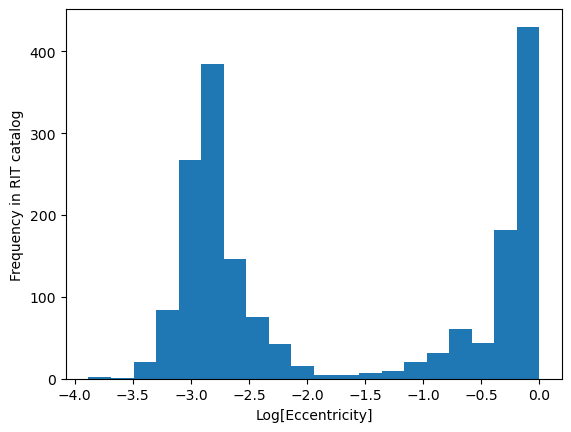

In [32]:
plt.figure()
plt.hist(np.log10(rit_eccentricities_filtered), bins=20)
plt.xlabel("Log[Eccentricity]")
plt.ylabel("Frequency in RIT catalog")

In [132]:
rc.simulations_dataframe.head(120)

catalog-tag resolution-tag id-tag  \
RIT:BBH:0001-n100-id3  RIT:BBH:0001           n100    id3   
RIT:BBH:0002-n100-id0  RIT:BBH:0002           n100    id0   
RIT:BBH:0003-n100-id0  RIT:BBH:0003           n100    id0   
RIT:BBH:0004-n100-id0  RIT:BBH:0004           n100    id0   
RIT:BBH:0005-n100-id0  RIT:BBH:0005           n100    id0   
...                             ...            ...    ...   
RIT:BBH:0116-n140-id3  RIT:BBH:0116           n140    id3   
RIT:BBH:0117-n140-id3  RIT:BBH:0117           n140    id3   
RIT:BBH:0118-n140-id3  RIT:BBH:0118           n140    id3   
RIT:BBH:0119-n140-id3  RIT:BBH:0119           n140    id3   
RIT:BBH:0120-n140-id3  RIT:BBH:0120           n140    id3   

                                               run-name data-type  \
RIT:BBH:0001-n100-id3          U0_D9.53_q1.00_a0.0_n100        NR   
RIT:BBH:0002-n100-id0   U0_D8.51_q6.00_a0.83333_n100_am        NR   
RIT:BBH:0003-n100-id0          U0_D8.65_q5.00_a0.8_n100        NR   
RIT:BBH:0004-n100-id0       U0_D8.8_q4.00_a0.75_n100_am        NR   
RIT:BBH:0005-n100-id0      U0_D9.07_q3.00_a0.66667_n100        NR   
...                                                 ...       ...   
RIT:BBH:0116-n140-id3    D11.50_q0.60_a0.0_0.0_opt_n140        NR   
RIT:BBH:0117-n140-id3    D11.00_q0.50_a0.0_0.0_opt_n140        NR   
RIT:BBH:0118-n140-id3    D11.25_q0.40_a0.0_0.0_opt_n140        NR   
RIT:BBH:0119-n140-id3  D11.00_q0.2500_a0.0_0.0_opt_n140        NR   
RIT:BBH:0120-n140-id3  D10.75_q0.2000_a0.0_0.0_opt_n140        NR   

                       system-type comments  \
RIT:BBH:0001-n100-id3  Nonspinning     none   
RIT:BBH:0002-n100-id0      Aligned     none   
RIT:BBH:0003-n100-id0      Aligned     none   
RIT:BBH:0004-n100-id0      Aligned     none   
RIT:BBH:0005-n100-id0      Aligned     none   
...                            ...      ...   
RIT:BBH:0116-n140-id3  Nonspinning     none   
RIT:BBH:0117-n140-id3  Nonspinning     none   
RIT:BBH:0118-n140-id3  Nonspinning     none   
RIT:BBH:0119-n140-id3  Nonspinning     none   
RIT:BBH:0120-n140-id3  Nonspinning     none   

                                                          authors-emails  \
RIT:BBH:0001-n100-id3  James Healy <jchsma@rit.edu>, Carlos Lousto <c...   
RIT:BBH:0002-n100-id0  James Healy <jchsma@rit.edu>, Carlos Lousto <c...   
RIT:BBH:0003-n100-id0  James Healy <jchsma@rit.edu>, Carlos Lousto <c...   
RIT:BBH:0004-n100-id0  James Healy <jchsma@rit.edu>, Carlos Lousto <c...   
RIT:BBH:0005-n100-id0  James Healy <jchsma@rit.edu>, Carlos Lousto <c...   
...                                                                  ...   
RIT:BBH:0116-n140-id3  James Healy <jchsma@rit.edu>, Carlos Lousto <c...   
RIT:BBH:0117-n140-id3  James Healy <jchsma@rit.edu>, Carlos Lousto <c...   
RIT:BBH:0118-n140-id3  James Healy <jchsma@rit.edu>, Carlos Lousto <c...   
RIT:BBH:0119-n140-id3  James Healy <jchsma@rit.edu>, Carlos Lousto <c...   
RIT:BBH:0120-n140-id3  James Healy <jchsma@rit.edu>, Carlos Lousto <c...   

                                            simulation-bibtex-keys  \
RIT:BBH:0001-n100-id3                 Healy:2014yta, Healy:2016lce   
RIT:BBH:0002-n100-id0  Healy:2014yta, Healy:2016lce, Healy:2018swt   
RIT:BBH:0003-n100-id0  Healy:2014yta, Healy:2016lce, Healy:2018swt   
RIT:BBH:0004-n100-id0  Healy:2014yta, Healy:2016lce, Healy:2018swt   
RIT:BBH:0005-n100-id0  Healy:2014yta, Healy:2016lce, Healy:2018swt   
...                                                            ...   
RIT:BBH:0116-n140-id3                 Healy:2017mvh, Healy:2018swt   
RIT:BBH:0117-n140-id3  Healy:2016lce, Healy:2017mvh, Healy:2018swt   
RIT:BBH:0118-n140-id3                 Healy:2017mvh, Healy:2018swt   
RIT:BBH:0119-n140-id3                 Healy:2017mvh, Healy:2018swt   
RIT:BBH:0120-n140-id3                 Healy:2017mvh, Healy:2018swt   

                        code-bibtex-keys  ... initial-bh-chi2y relaxed-chi1x  \
RIT:BBH:0001-n100-id3  Campanelli:2005dd  ...              NaN 

In [147]:
rm = rc.get("RIT:BBH:0117-n140-id3")

In [148]:
rm.get_parameters(20)

{'mass1': 13.333326338847964,
 'mass2': 6.666673661152036,
 'spin1x': 0,
 'spin1y': 0,
 'spin1z': -2.11362576357037e-06,
 'spin2x': 0,
 'spin2y': 0,
 'spin2z': 0.0,
 'f_lower': 83.4958575959485}

In [149]:
rm.metadata

Metadata([('Unnamed__0', 116),
          ('catalog_tag', 'RIT:BBH:0117'),
          ('resolution_tag', 'n140'),
          ('id_tag', 'id3'),
          ('run_name', 'D11.00_q0.50_a0.0_0.0_opt_n140'),
          ('data_type', 'NR'),
          ('system_type', 'Nonspinning'),
          ('comments', 'none'),
          ('authors_emails',
           'James Healy <jchsma@rit.edu>, Carlos Lousto <colsma@rit.edu>'),
          ('simulation_bibtex_keys',
           'Healy:2016lce, Healy:2017mvh, Healy:2018swt'),
          ('code_bibtex_keys', 'Campanelli:2005dd'),
          ('initial_data_bibtex_keys',
           'Bowen:1980yu, Brandt:1997tf, Ansorg:2004ds'),
          ('quasicircular_bibtex_keys', 'Husa:2007rh, Buonanno:2010yk'),
          ('eccentricity_bibtex_keys', 'Campanelli:2008nk'),
          ('extrapolation_bibtex_keys', 'Nakano:2015pta'),
          ('code', 'LazEv'),
          ('evolution_system', 'BSSN'),
          ('evolution_gauge', '1+log/Gamma-driver(eta'),
          ('cfl', 0.333333

In [146]:
1566.9698374037089 / 20

78.34849187018544

In [151]:
# pp = rm.get_parameters(total_mass)
# pp["f_lower"] *= 0.8
pp = rm.get_parameters(total_mass)

# pp["f_lower"]  /= (total_mass * lal.MTSUN_SI)

pp

{'mass1': 13.333326338847964,
 'mass2': 6.666673661152036,
 'spin1x': 0,
 'spin1y': 0,
 'spin1z': -2.11362576357037e-06,
 'spin2x': 0,
 'spin2y': 0,
 'spin2z': 0.0,
 'f_lower': 83.4958575959485}

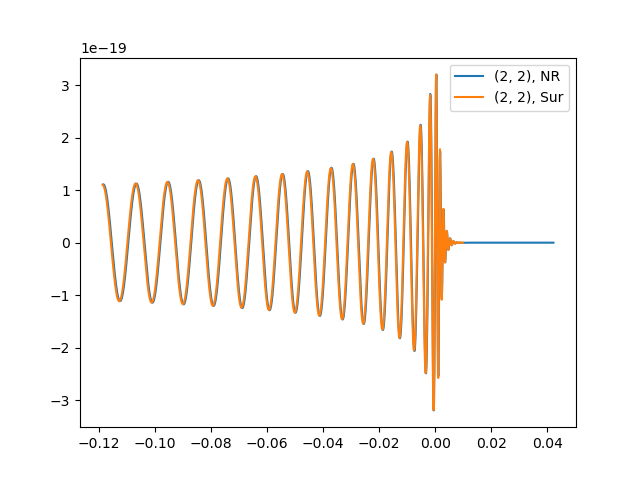

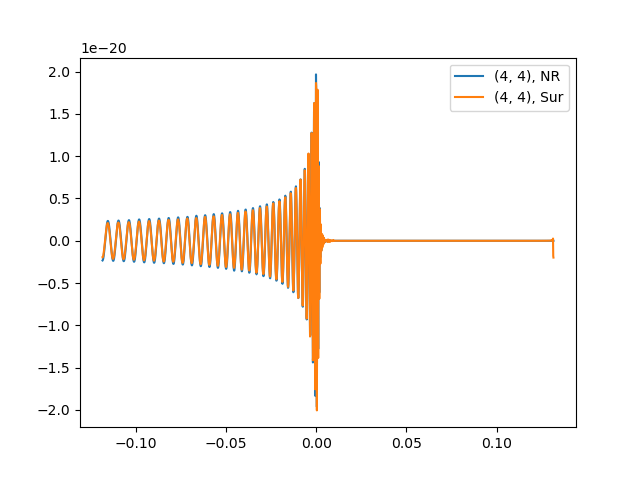

In [152]:
total_mass = 20.0
# %matplotlib widget
modesur = wf.get_td_waveform_modes(
    approximant="NRSur7dq4", delta_t=1.0 / 8192, **pp  # **rm.get_parameters(total_mass)
)

modeLM = (2, 2)
hpsur, hcsur = modesur[modeLM]
h = rm.get_mode(*modeLM, total_mass, distance=1, delta_t=1.0 / 8192)

# hpsur, h = wf.coalign_waveforms(hpsur, h.real())
# h, hpsur = wf.coalign_waveforms(h.real(), hpsur)

plt.figure()
plt.plot(h.sample_times, h, label=f"{modeLM}, NR")
plt.plot(hpsur.sample_times, hpsur, label=f"{modeLM}, Sur")
plt.legend()

modeLM = (4, 4)
hpsur, hcsur = modesur[modeLM]
h = rm.get_mode(*modeLM, total_mass, distance=1, delta_t=1.0 / 8192)

hpsur, h = wf.coalign_waveforms(hpsur, h.real())

plt.figure()
plt.plot(h.sample_times, h, label=f"{modeLM}, NR")
plt.plot(hpsur.sample_times, hpsur, label=f"{modeLM}, Sur")
plt.legend()

In [82]:
sm = sc.get("SXS:BBH:0109")

Found the following files to load from the SXS catalog:
    SXS:BBH:0109v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


  0%|          | 0/81580223 [00:00<?, ?it/s]

/home/prayush/miniconda3/envs/igwn-py39/lib/python3.9/site-packages/sxs/waveforms/format_handlers/nrar.py:176: UserWarning: 
Could not find root group as `h5_group` or as `extrapolation_order`; returning all groups
  warnings.warn(warning)


In [85]:
sm.get_parameters(40)

{'mass1': 33.33575888878969,
 'mass2': 6.6642411112103055,
 'spin1x': 2.68923390602e-11,
 'spin1y': -8.24271574813e-12,
 'spin1z': -0.499549,
 'spin2x': -9.442604812e-12,
 'spin2y': -8.04494001501e-12,
 'spin2z': 5.58927267666e-07,
 'f_lower': 31.79825937694275}

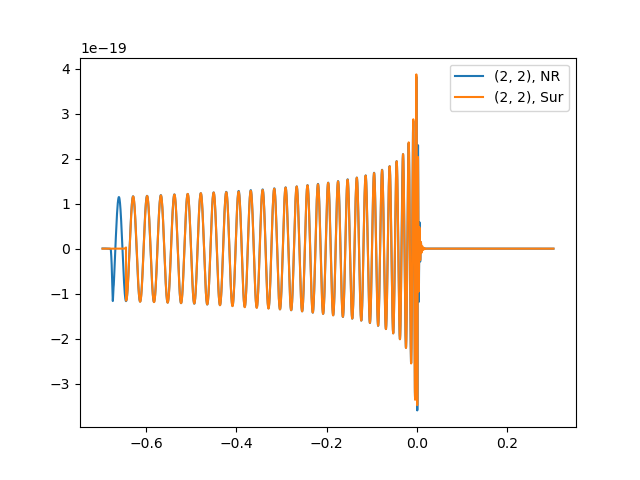

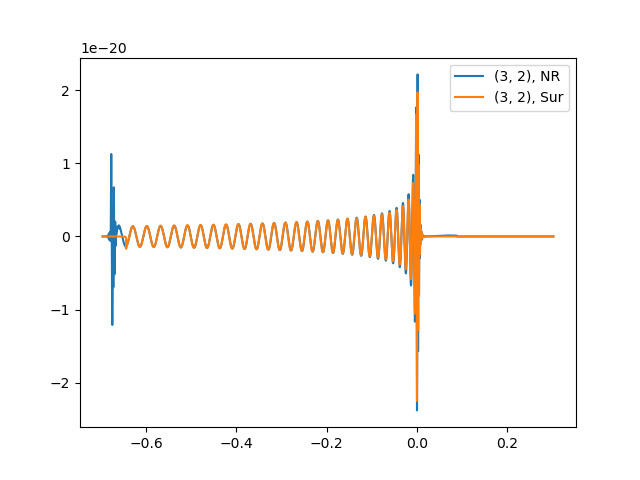

In [95]:
total_mass = 40.0
%matplotlib widget
modesur = wf.get_td_waveform_modes(
    approximant="NRSur7dq4", delta_t=1.0 / 8192, **sm.get_parameters(total_mass)
)

modeLM = (2, 2)
hpsur, hcsur = modesur[modeLM]
h = sm.get_mode(*modeLM, total_mass, distance=1, delta_t=1.0 / 8192)

hpsur, h = wf.coalign_waveforms(hpsur, h.real())

plt.figure()
plt.plot(h.sample_times, h, label=f"{modeLM}, NR")
plt.plot(hpsur.sample_times, hpsur, label=f"{modeLM}, Sur")
# plt.plot(h[258:], label=f"{modeLM}, NR")
# plt.plot(hpsur, label=f"{modeLM}, Sur")
plt.legend()

modeLM = (3, 2)
hpsur, hcsur = modesur[modeLM]
h = sm.get_mode(*modeLM, total_mass, distance=1, delta_t=1.0 / 8192)

hpsur, h = wf.coalign_waveforms(hpsur, h.real())

plt.figure()
plt.plot(h.sample_times, h, label=f"{modeLM}, NR")
plt.plot(hpsur.sample_times, hpsur, label=f"{modeLM}, Sur")
plt.legend()

In [65]:
total_mass = 40.0
# %matplotlib widget
modesur = wf.get_td_waveform_modes(
    approximant="NRSur7dq4", delta_t=1.0 / 8192, **sm.get_parameters(total_mass)
)

modeLM = (4, 4)
hpsur, hcsur = modesur[modeLM]
h = sm.get_mode(*modeLM, total_mass, distance=1, delta_t=1.0 / 8192)

In [66]:
hpsur.append_zeros(len(h.real()) - len(hpsur))

In [67]:
import pycbc.filter as filter

filter.match(h.real(), hpsur)

(0.9022233597755466, 548)

In [96]:
sm = sc.get("SXS:BBH:0009")

Found the following files to load from the SXS catalog:
    SXS:BBH:0009v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


/home/prayush/miniconda3/envs/igwn-py39/lib/python3.9/site-packages/sxs/waveforms/format_handlers/nrar.py:176: UserWarning: 
Could not find root group as `h5_group` or as `extrapolation_order`; returning all groups
  warnings.warn(warning)


In [97]:
sc.get_parameters("SXS:BBH:0009", 20)

{'mass1': 12.002189538793484,
 'mass2': 7.997810461206516,
 'spin1x': -2.37902937782e-12,
 'spin1y': 2.83657568796e-11,
 'spin1z': 0.499512906015,
 'spin2x': -5.4100052218e-09,
 'spin2y': -1.78473241353e-09,
 'spin2z': 4.11085265413e-07,
 'f_lower': 56.83435051334582}

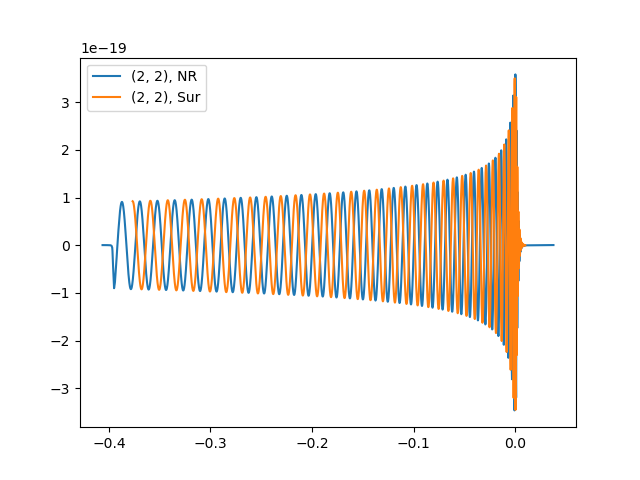

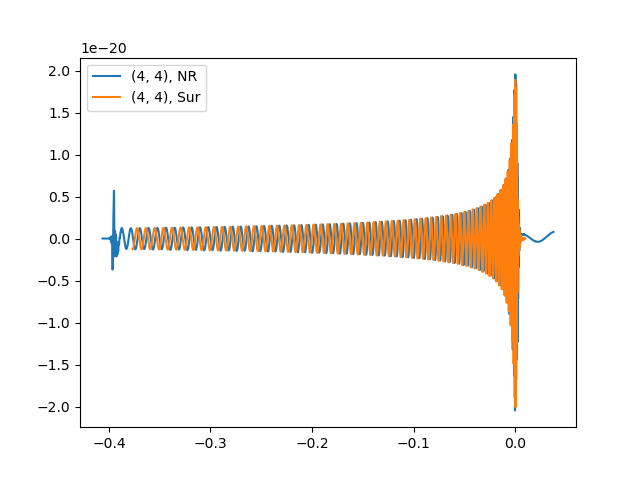

In [99]:
total_mass = 20.0
# %matplotlib widget
modesur = wf.get_td_waveform_modes(
    approximant="NRSur7dq4", delta_t=1.0 / 8192, **sm.get_parameters(total_mass)
)

modeLM = (2, 2)
hpsur, hcsur = modesur[modeLM]
h = sm.get_mode(*modeLM, total_mass, distance=1, delta_t=1.0 / 8192)

# hpsur, h = wf.coalign_waveforms(hpsur, h.real())

plt.figure()
plt.plot(h.sample_times, h, label=f"{modeLM}, NR")
plt.plot(hpsur.sample_times, hpsur, label=f"{modeLM}, Sur")
plt.legend()

modeLM = (4, 4)
hpsur, hcsur = modesur[modeLM]
h = sm.get_mode(*modeLM, total_mass, distance=1, delta_t=1.0 / 8192)

# hpsur, h = wf.coalign_waveforms(hpsur, h.real())

plt.figure()
plt.plot(h.sample_times, h, label=f"{modeLM}, NR")
plt.plot(hpsur.sample_times, hpsur, label=f"{modeLM}, Sur")
plt.legend()

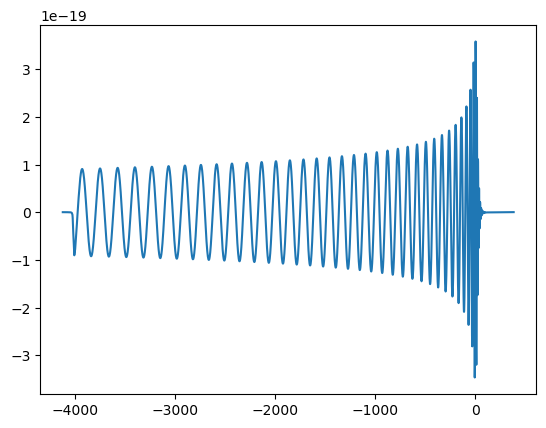

In [41]:
total_mass = 20.0
modeLM = (2, 2)

h = sm.get_mode(*modeLM, total_mass, distance=1, delta_t=1.0 / 8192)
plt.figure()
plt.plot(h.sample_times / total_mass / lal.MTSUN_SI, h)
# plt.plot(hpsur.sample_times, hpsur)

In [45]:
gm = gc.get("GT0002")

In [46]:
gm.sim_metadata

Metadata([('GTID', 'GT0002'),
          ('GT_Tag', 'fr_b3.1_a0.4_oth.045_M77'),
          ('q', 1.0),
          ('a1x', 0.2828),
          ('a1y', 0.0),
          ('a1z', 0.2828),
          ('a2x', -0.4001),
          ('a2y', 0.0),
          ('a2z', 0.0),
          ('af', nan),
          ('mf', nan),
          ('Momega', 0.09993),
          ('metadata_location',
           '/home/prayush/.cache/MAYA/metadata/GT0002.txt'),
          ('metadata_link',
           'https://raw.githubusercontent.com/cevans216/gt-waveform-catalog/master/catalog-table.txt'),
          ('waveform_data_link',
           'https://raw.githubusercontent.com/cevans216/gt-waveform-catalog/master/h5files/GT0002.h5'),
          ('waveform_data_location',
           '/home/prayush/.cache/MAYA/data/GT0002.h5')])

## TEST

In [17]:
sc = SXSCatalog.load(download=True)
rc = RITCatalog.load(download=True)
mc = MayaCatalog.load(verbosity=5)

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer


KeyboardInterrupt: 

In [ ]:
rc._dict["simulations"]["RIT:BBH:0001-n100-id3"]

Metadata([('Unnamed__0', 0),
          ('catalog_tag', 'RIT:BBH:0001'),
          ('resolution_tag', 'n100'),
          ('id_tag', 'id3'),
          ('run_name', 'U0_D9.53_q1.00_a0.0_n100'),
          ('data_type', 'NR'),
          ('system_type', 'Nonspinning'),
          ('comments', 'none'),
          ('authors_emails',
           'James Healy <jchsma@rit.edu>, Carlos Lousto <colsma@rit.edu>'),
          ('simulation_bibtex_keys', 'Healy:2014yta, Healy:2016lce'),
          ('code_bibtex_keys', 'Campanelli:2005dd'),
          ('initial_data_bibtex_keys',
           'Bowen:1980yu, Brandt:1997tf, Ansorg:2004ds'),
          ('quasicircular_bibtex_keys', 'Husa:2007rh, Buonanno:2010yk'),
          ('eccentricity_bibtex_keys', 'Campanelli:2008nk'),
          ('extrapolation_bibtex_keys', 'Nakano:2015pta'),
          ('code', 'LazEv'),
          ('evolution_system', 'BSSN'),
          ('evolution_gauge', '1+log/Gamma-driver(eta'),
          ('cfl', 0.25),
          ('fd_order', 8.0),
      

In [ ]:
rc.simulations_dataframe.columns

Index(['catalog-tag', 'resolution-tag', 'id-tag', 'run-name', 'data-type',
       'system-type', 'comments', 'authors-emails', 'simulation-bibtex-keys',
       'code-bibtex-keys', 'initial-data-bibtex-keys',
       'quasicircular-bibtex-keys', 'eccentricity-bibtex-keys',
       'extrapolation-bibtex-keys', 'code', 'evolution-system',
       'evolution-gauge', 'cfl', 'fd-order', 'dissipation-order',
       'eccentricity-measurement-method', 'eccentricity', 'freq-start-22',
       'freq-start-22-Hz-1Msun', 'number-of-cycles-22', 'initial-data-type',
       'initial-ADM-energy', 'initial-orbital-angular-momentum',
       'initial-ADM-angular-momentum-x', 'initial-ADM-angular-momentum-y',
       'initial-ADM-angular-momentum-z', 'initial-separation', 'initial-mass1',
       'initial-mass2', 'initial-total-mass', 'initial-bh-chi1z',
       'initial-bh-chi2z', 'relaxed-time', 'relaxed-mass1', 'relaxed-mass2',
       'relaxed-total-mass', 'relaxed-mass-ratio-1-over-2', 'relaxed-LNhatx',
     

In [ ]:
rc.simulations_dataframe["metadata_location"]

RIT:BBH:0001-n100-id3    /home/prayush/.cache/RIT/metadata/RIT:BBH:0001...
RIT:BBH:0002-n100-id0    /home/prayush/.cache/RIT/metadata/RIT:BBH:0002...
RIT:BBH:0003-n100-id0    /home/prayush/.cache/RIT/metadata/RIT:BBH:0003...
RIT:BBH:0004-n100-id0    /home/prayush/.cache/RIT/metadata/RIT:BBH:0004...
RIT:BBH:0005-n100-id0    /home/prayush/.cache/RIT/metadata/RIT:BBH:0005...
                                               ...                        
RIT:BBH:1919-n100-id1    /home/prayush/.cache/RIT/metadata/RIT:BBH:1919...
RIT:BBH:1920-n100-id1    /home/prayush/.cache/RIT/metadata/RIT:BBH:1920...
RIT:BBH:1921-n100-id1    /home/prayush/.cache/RIT/metadata/RIT:BBH:1921...
RIT:BBH:1922-n100-id1    /home/prayush/.cache/RIT/metadata/RIT:BBH:1922...
RIT:BBH:1923-n100-id1    /home/prayush/.cache/RIT/metadata/RIT:BBH:1923...
Name: metadata_location, Length: 1879, dtype: object

In [ ]:
rc.simulations_dataframe

catalog-tag resolution-tag id-tag  \
RIT:BBH:0001-n100-id3  RIT:BBH:0001           n100    id3   
RIT:BBH:0002-n100-id0  RIT:BBH:0002           n100    id0   
RIT:BBH:0003-n100-id0  RIT:BBH:0003           n100    id0   
RIT:BBH:0004-n100-id0  RIT:BBH:0004           n100    id0   
RIT:BBH:0005-n100-id0  RIT:BBH:0005           n100    id0   
...                             ...            ...    ...   
RIT:BBH:1919-n100-id1  RIT:BBH:1919           n100    id1   
RIT:BBH:1920-n100-id1  RIT:BBH:1920           n100    id1   
RIT:BBH:1921-n100-id1  RIT:BBH:1921           n100    id1   
RIT:BBH:1922-n100-id1  RIT:BBH:1922           n100    id1   
RIT:BBH:1923-n100-id1  RIT:BBH:1923           n100    id1   

                                                      run-name data-type  \
RIT:BBH:0001-n100-id3                 U0_D9.53_q1.00_a0.0_n100        NR   
RIT:BBH:0002-n100-id0          U0_D8.51_q6.00_a0.83333_n100_am        NR   
RIT:BBH:0003-n100-id0                 U0_D8.65_q5.00_a0.8_n100        NR   
RIT:BBH:0004-n100-id0              U0_D8.8_q4.00_a0.75_n100_am        NR   
RIT:BBH:0005-n100-id0             U0_D9.07_q3.00_a0.66667_n100        NR   
...                                                        ...       ...   
RIT:BBH:1919-n100-id1  D11.82_q0.2500_a0.8_th30_ph285_opt_n100        NR   
RIT:BBH:1920-n100-id1  D11.82_q0.2500_a0.8_th30_ph135_opt_n100        NR   
RIT:BBH:1921-n100-id1  D11.81_q0.2500_a0.8_th30_ph195_opt_n100        NR   
RIT:BBH:1922-n100-id1    D11.81_q0.2500_a0.8_th30_ph0_opt_n100        NR   
RIT:BBH:1923-n100-id1   D11.82_q0.2500_a0.8_th30_ph90_opt_n100        NR   

                       system-type comments  \
RIT:BBH:0001-n100-id3  Nonspinning     none   
RIT:BBH:0002-n100-id0      Aligned     none   
RIT:BBH:0003-n100-id0      Aligned     none   
RIT:BBH:0004-n100-id0      Aligned     none   
RIT:BBH:0005-n100-id0      Aligned     none   
...                            ...      ...   
RIT:BBH:1919-n100-id1   Precessing     none   
RIT:BBH:1920-n100-id1   Precessing     none   
RIT:BBH:1921-n100-id1   Precessing     none   
RIT:BBH:1922-n100-id1   Precessing     none   
RIT:BBH:1923-n100-id1   Precessing     none   

                                                          authors-emails  \
RIT:BBH:0001-n100-id3  James Healy <jchsma@rit.edu>, Carlos Lousto <c...   
RIT:BBH:0002-n100-id0  James Healy <jchsma@rit.edu>, Carlos Lousto <c...   
RIT:BBH:0003-n100-id0  James Healy <jchsma@rit.edu>, Carlos Lousto <c...   
RIT:BBH:0004-n100-id0  James Healy <jchsma@rit.edu>, Carlos Lousto <c...   
RIT:BBH:0005-n100-id0  James Healy <jchsma@rit.edu>, Carlos Lousto <c...   
...                                                                  ...   
RIT:BBH:1919-n100-id1  James Healy <jchsma@rit.edu>, Carlos Lousto <c...   
RIT:BBH:1920-n100-id1  James Healy <jchsma@rit.edu>, Carlos Lousto <c...   
RIT:BBH:1921-n100-id1  James Healy <jchsma@rit.edu>, Carlos Lousto <c...   
RIT:BBH:1922-n100-id1  James Healy <jchsma@rit.edu>, Carlos Lousto <c...   
RIT:BBH:1923-n100-id1  James Healy <jchsma@rit.edu>, Carlos Lousto <c...   

                                            simulation-bibtex-keys  \
RIT:BBH:0001-n100-id3                 Healy:2014yta, Healy:2016lce   
RIT:BBH:0002-n100-id0  Healy:2014yta, Healy:2016lce, Healy:2018swt   
RIT:BBH:0003-n100-id0  Healy:2014yta, Healy:2016lce, Healy:2018swt   
RIT:BBH:0004-n100-id0  Healy:2014yta, Healy:2016lce, Healy:2018swt   
RIT:BBH:0005-n100-id0  Healy:2014yta, Healy:2016lce, Healy:2018swt   
...                                                            ...   
RIT:BBH:1919-n100-id1                                          NaN   
RIT:BBH:1920-n100-id1                                          NaN   
RIT:BBH:1921-n100-id1                                          NaN   
RIT:BBH:1922-n100-id1                                          NaN   
RIT:BBH:1923-n100-id1                                          NaN   

                        code-bibtex-keys  ... initial-bh-ch

In [ ]:
rc.waveform_filepath_from_simname("RIT:BBH:0001-n100-id3")

'/home/prayush/.cache/RIT/data/ExtrapStrain_RIT-BBH-0001-n100.h5'

In [ ]:
rc.metadata_filepath_from_simname("RIT:BBH:0001-n100-id3")

'/home/prayush/.cache/RIT/metadata/RIT:BBH:0001-n100-id3_Metadata.txt'

In [ ]:
sc.waveform_filepath_from_simname("SXS:BBH:0001")

'/home/prayush/.cache/sxs/SXS:BBH:0001v3/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5'

In [ ]:
sc.metadata_filepath_from_simname("SXS:BBH:0001")

'/home/prayush/.cache/sxs/SXS:BBH:0001v6/Lev5/metadata.json'

In [ ]:
sim_name = "RIT:BBH:0001-n100-id3"
rc.get_metadata(sim_name)

catalog-tag                     RIT:BBH:0001
resolution-tag                          n100
id-tag                                   id3
run-name            U0_D9.53_q1.00_a0.0_n100
data-type                                 NR
                              ...           
number-of-orbits                         NaN
peak-omega-22                            NaN
peak-ampl-22                             NaN
Msun                                     NaN
simulation_name        RIT:BBH:0001-n100-id3
Name: RIT:BBH:0001-n100-id3, Length: 71, dtype: object

In [ ]:
rwf = rc.get(sim_name)
rwf

WaveformModes([[ 1.54072404e-01+3.51391549e-04j, -6.83134487e-17+1.15011899e-18j,
         5.06394859e-06+3.66229411e-17j, ...,
         1.41533043e-04-3.89219790e-06j, -1.86872384e-18-1.24845250e-18j,
        -2.85732231e-03-3.35382373e-05j],
       [ 1.54035617e-01+2.90580411e-03j, -6.95991189e-17+1.21661681e-18j,
         5.07226651e-06+3.72679899e-17j, ...,
         1.41396776e-04-6.21504943e-06j, -1.86641568e-18-1.26277082e-18j,
        -2.85752330e-03+6.11755740e-05j],
       [ 1.53956567e-01+5.45978223e-03j, -7.08775546e-17+1.29800105e-18j,
         5.07398071e-06+2.18758405e-17j, ...,
         1.41224160e-04-8.53346171e-06j, -1.86348064e-18-1.27783348e-18j,
        -2.85457273e-03+1.55861614e-04j],
       ...,
       [ 2.01542808e-14-9.87275020e-29j, -7.08866190e-18-1.73622142e-33j,
         1.16807527e-12-2.86095929e-28j, ...,
        -6.56351847e-12+2.05853846e-25j, -3.47150328e-20+3.06184259e-34j,
         9.76707315e-13-1.64646773e-25j],
       [ 1.03432296e-14+9.63189211e-

In [ ]:
rwf.f_lower_at_1Msun

lal.MSUN_SI != Msun
setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


2143.168221174926

In [ ]:
rh = rwf.get_td_waveform(100, 1, 0, 0, 1.0 / 2048)
rhp, rhc = rh.real(), -1 * rh.imag()
from pycbc.waveform import frequency_from_polarizations

rfr = frequency_from_polarizations(rhp, rhc)
rfr.data

array([ 2.14396596e+01,  2.14618977e+01,  2.14836544e+01,  2.15049040e+01,
        2.15253768e+01,  2.15448478e+01,  2.15634779e+01,  2.15812605e+01,
        2.15980946e+01,  2.16137731e+01,  2.16283299e+01,  2.16419065e+01,
        2.16546088e+01,  2.16663721e+01,  2.16769970e+01,  2.16863106e+01,
        2.16947964e+01,  2.17033227e+01,  2.17111160e+01,  2.17173935e+01,
        2.17228883e+01,  2.17283901e+01,  2.17340009e+01,  2.17392560e+01,
        2.17439663e+01,  2.17487455e+01,  2.17535809e+01,  2.17584011e+01,
        2.17636030e+01,  2.17694421e+01,  2.17756599e+01,  2.17822350e+01,
        2.17894311e+01,  2.17973940e+01,  2.18061057e+01,  2.18154487e+01,
        2.18256054e+01,  2.18368479e+01,  2.18490378e+01,  2.18619880e+01,
        2.18757900e+01,  2.18905614e+01,  2.19061654e+01,  2.19224739e+01,
        2.19395086e+01,  2.19572732e+01,  2.19757529e+01,  2.19950205e+01,
        2.20151282e+01,  2.20358233e+01,  2.20566347e+01,  2.20774780e+01,
        2.20983591e+01,  

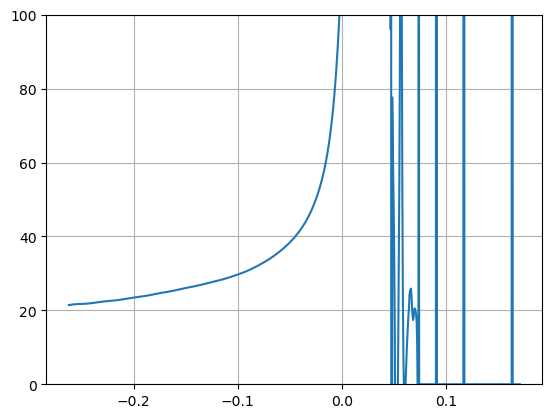

In [ ]:
plt.plot(rfr.sample_times, rfr)
plt.ylim(0, 100)
plt.grid()

In [ ]:
htest = rwf.evaluate([np.pi / 3, 0])

In [ ]:
np.shape(htest)

(3525,)

In [ ]:
rwf.ndarray.shape

(3525, 21)

In [ ]:
wigner = spherical.Wigner(4, 2, mp_max=2)
wigner.sYlm(-2, np.asarray([0, 0, 1, 0]))

array([ 0.63078313+0.j,  0.        +0.j,  0.        +0.j, -0.        +0.j,
        0.        +0.j,  0.        +0.j, -0.74635267+0.j,  0.        +0.j,
       -0.        +0.j, -0.        +0.j,  0.        +0.j, -0.        +0.j,
        0.        +0.j,  0.        +0.j,  0.84628438+0.j,  0.        +0.j,
        0.        +0.j, -0.        +0.j,  0.        +0.j, -0.        +0.j,
        0.        +0.j])

In [ ]:
wigner.sYlm(-2, np.asarray([0, 0, 1, 0])).shape

(21,)

In [ ]:
np.dot(rwf.ndarray, wigner.sYlm(-2, np.asarray([0, 0, 1, 0]))).shape

(3525,)

In [ ]:
sc.simulations_dataframe

object_types  initial_separation  initial_orbital_frequency  \
SXS:BBH:0001          BHBH               18.00                   0.012203   
SXS:BBH:0002          BHBH               19.00                   0.011292   
SXS:BBH:0003          BHBH               19.00                   0.011284   
SXS:BBH:0004          BHBH               19.00                   0.011313   
SXS:BBH:0005          BHBH               18.00                   0.012168   
...                    ...                 ...                        ...   
SXS:BHNS:0003         BHNS               51.43                   0.005595   
SXS:BHNS:0004         BHNS               39.20                   0.006233   
SXS:BHNS:0005         BHNS               39.20                   0.006235   
SXS:BHNS:0006         BHNS               52.50                   0.004524   
SXS:BHNS:0007         BHNS               56.00                   0.004454   

               initial_adot  initial_ADM_energy  \
SXS:BBH:0001      -0.000025            0.993736   
SXS:BBH:0002      -0.000021            0.994031   
SXS:BBH:0003      -0.000019            0.994277   
SXS:BBH:0004      -0.000028            0.994314   
SXS:BBH:0005      -0.000016            0.993947   
...                     ...                 ...   
SXS:BHNS:0003      0.000000            5.400000   
SXS:BHNS:0004     -0.000022            2.778112   
SXS:BHNS:0005     -0.000025            2.780039   
SXS:BHNS:0006     -0.000012            3.475229   
SXS:BHNS:0007     -0.000015            4.171456   

                                     initial_ADM_linear_momentum  \
SXS:BBH:0001       [7.5160071e-09, 2.4389069e-09, -5.798632e-10]   
SXS:BBH:0002     [1.6810827e-09, 1.4244131e-09, -1.14839759e-08]   
SXS:BBH:0003   [2.599703e-09, -4.1239227e-09, 6.03918869017e-05]   
SXS:BBH:0004       [-2.7524803e-09, 5.883293e-09, 5.3376578e-09]   
SXS:BBH:0005      [-3.7413651e-09, -2.4006761e-09, 7.874335e-10]   
...                                                          ...   
SXS:BHNS:0003                                    [0.0, 0.0, 0.0]   
SXS:BHNS:0004  [-1.2457454507e-06, 5.44427247228e-06, -6.2716...   
SXS:BHNS:0005  [2.981054730059816e-06, -1.22406716840395e-06,...   
SXS:BHNS:0006  [-3.413420373258928e-06, -2.0768413414982537e-...   
SXS:BHNS:0007  [4.867002495810236e-07, -1.5158476150901928e-0...   

               initial_ADM_linear_momentum_mag  \
SXS:BBH:0001                      7.923059e-09   
SXS:BBH:0002                      1.169345e-08   
SXS:BBH:0003                      6.039189e-05   
SXS:BBH:0004                      8.407132e-09   
SXS:BBH:0005                      4.514544e-09   
...                                        ...   
SXS:BHNS:0003                     0.000000e+00   
SXS:BHNS:0004                     5.620082e-06   
SXS:BHNS:0005                     3.222581e-06   
SXS:BHNS:0006                     3.995587e-06   
SXS:BHNS:0007                     1.516629e-05   

                                    initial_ADM_angular_momentum  \
SXS:BBH:0001   [4.27581822e-08, -2.342625073e-07, 1.184715566...   
SXS:BBH:0002   [2.7620419806e-06, -2.4287931932e-06, 1.210130...   
SXS:BBH:0003   [0.1251774015530911, -0.0006755685628109, 1.21...   
SXS:BBH:0004   [8.163645183e-07, 7.736321355e-07, 1.094457487...   
SXS:BBH:0005   [9.790607752e-07, 1.026494432e-07, 1.300909689...   
...                                                          ...   
SXS:BHNS:0003                      [0.0, 0.0, 16.60638426824671]   
SXS:BHNS:0004                      [0.0, 0.0, 8.447059816549256]   
SXS:BHNS:0005                      [0.0, 0.0, 8.111755992167552]   
SXS:BHNS:0006                     [0.0, 0.0, 12.993342233650518]   
SXS:BHNS:0007                      [0.0, 0.0, 16.29283505660932]   

               initial_ADM_angular_momentum_mag  initial_mass1  ...  \
SXS:BBH:0001                           1.184716        0.50000  ...   
SXS:BBH:0002                           1.210131        0.50000  ...   
SXS:BBH:0003                

In [ ]:
sim_name = "SXS:BBH:0001"
smd = sc.get_metadata(sim_name)
smd

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0001v6/Lev5/metadata.json


Metadata([('simulation_name', 'd18.0_q1.0_s0_0_0_s0_0_0/Lev5'),
          ('alternative_names', 'SXS:BBH:0001'),
          ('initial_data_type', 'BBH_CFMS'),
          ('object_types', 'BHBH'),
          ('number_of_orbits', 28.1190834141),
          ('reference_mass_ratio', 0.9999999899440033),
          ('reference_chi_eff', 1.2156391861217613e-07),
          ('reference_chi1_perp', 9.733308972643856e-10),
          ('reference_chi2_perp', 1.4299394525915949e-09),
          ('reference_eccentricity', 0.0002569),
          ('reference_dimensionless_spin1',
           [7.09752141352e-10, -6.66051760901e-10, 1.20930921804e-07]),
          ('reference_dimensionless_spin2',
           [5.84453420303e-10, 1.30504445113e-09, 1.22196915414e-07]),
          ('reference_orbital_frequency',
           [2.82808523611e-13, -8.25159171205e-13, 0.0122754056311]),
          ('reference_mass1', 0.500000161328),
          ('reference_mass2', 0.500000166356),
          ('reference_time', 320.0),
      

In [ ]:
swf = sc.get(sim_name, 2)
swf

Found the following files to load from the SXS catalog:
    SXS:BBH:0001v6/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


/home/prayush/miniconda3/envs/lalsuite-dev-sxs/lib/python3.10/site-packages/sxs/waveforms/nrar.py:176: UserWarning: 
Could not find root group as `h5_group` or as `extrapolation_order`; returning all groups
  warnings.warn(warning)


WaveformModes([[ 4.35110689e-04-1.02152370e-03j, -4.74434117e-11-4.62757493e-11j,
        -2.81759814e-04-8.52883891e-14j, ...,
        -1.63744585e-09-5.20794761e-09j, -1.64269946e-11-6.08956676e-12j,
         5.56348847e-09-2.23973035e-09j],
       [ 4.36959709e-04-1.01562374e-03j, -5.74582748e-11-7.32078466e-11j,
        -2.81701470e-04-7.71392193e-14j, ...,
        -5.69803980e-09-4.43587738e-09j, -1.25355325e-11-1.21912076e-11j,
         6.30718621e-09-5.22775633e-09j],
       [ 4.38714027e-04-1.00972466e-03j, -5.92874398e-11-1.01867763e-10j,
        -2.81636597e-04-6.57034437e-14j, ...,
        -9.73881877e-09-3.03849891e-09j, -7.53617199e-12-1.54345605e-11j,
         6.74719571e-09-7.61488992e-09j],
       ...,
       [ 3.56009715e-04+2.07644218e-04j,  3.05168629e-11+2.86534942e-10j,
        -6.34810242e-05+2.84932509e-11j, ...,
        -5.53228491e-08+1.82724965e-07j,  6.71970901e-11+5.03004739e-11j,
         3.19352273e-08-1.43993117e-06j],
       [ 3.56013247e-04+2.07926907e-

In [ ]:
swf.get_mode(2, -2)

array([[-1.08263897e+02,  4.35110689e-04, -1.02152370e-03],
       [-1.07763898e+02,  4.36959709e-04, -1.01562374e-03],
       [-1.07263899e+02,  4.38714027e-04, -1.00972466e-03],
       ...,
       [ 9.91224770e+03,  3.56009715e-04,  2.07644218e-04],
       [ 9.91234770e+03,  3.56013247e-04,  2.07926907e-04],
       [ 9.91244770e+03,  3.56011997e-04,  2.08211314e-04]])

In [ ]:
ls.SimInspiralNRWaveformGetSpinsFromHDF5File

<function lalsimulation._lalsimulation.SimInspiralNRWaveformGetSpinsFromHDF5File>

In [ ]:
ls.SimInspiralNRWaveformGetRotationAngles

AttributeError: module 'lalsimulation' has no attribute 'SimInspiralNRWaveformGetRotationAngles'

In [ ]:
?ls.SimInspiralNRWaveformGetHplusHcross

Docstring: SimInspiralNRWaveformGetHplusHcross(REAL8 phiRef, REAL8 inclination, REAL8 deltaT, REAL8 m1, REAL8 m2, REAL8 r, REAL8 fStart, REAL8 fRef, REAL8 s1x, REAL8 s1y, REAL8 s1z, REAL8 s2x, REAL8 s2y, REAL8 s2z, char const * NRDataFile, Value ModeArray) -> int
Type:      builtin_function_or_method

In [ ]:
?ls.SimInspiralNRWaveformGetModes

Object `ls.SimInspiralNRWaveformGetModes` not found.


In [ ]:
mc.simulations_dataframe

simulation_name                                 GT_Tag    q     a1x  \
GT0001          GT0001               fr_b3.1_a0.4_oth.000_M77  1.0     0.0   
GT0002          GT0002               fr_b3.1_a0.4_oth.045_M77  1.0  0.2828   
GT0003          GT0003               fr_b3.1_a0.4_oth.090_M77  1.0     0.4   
GT0004          GT0004               fr_b3.1_a0.4_oth.135_M77  1.0  0.2829   
GT0005          GT0005               fr_b3.1_a0.4_oth.180_M77  1.0     0.0   
...                ...                                    ...  ...     ...   
GT0895          GT0895  D9_q2.0_a0.6_0.6_th315_r100_res140_CE  2.0  0.5127   
GT0896          GT0896   D9_q2.0_a0.6_0.6_th45_r100_res140_CE  2.0 -0.5127   
GT0897          GT0897   D9_q2.0_a0.6_0.6_th90_r100_res140_CE  2.0  0.5012   
GT0898          GT0898                GW15_D12_q1.2_a0.0_m140  1.2     0.0   
GT0900          GT0900          q1.2_a0.4x_0.4x_GW15_D11_m140  1.2  0.4001   

           a1y     a1z     a2x     a2y     a2z      af      mf   Momega  
GT0001     0.0  0.3999 -0.4001     0.0     0.0     NaN     NaN  0.09132  
GT0002     0.0  0.2828 -0.4001     0.0     0.0     NaN     NaN  0.09993  
GT0003     0.0    -0.0    -0.4     0.0     0.0     NaN     NaN  0.14025  
GT0004     0.0 -0.2829 -0.3999     0.0     0.0     NaN     NaN  0.35815  
GT0005     0.0 -0.4001 -0.3999     0.0     0.0     NaN     NaN  0.41468  
...        ...     ...     ...     ...     ...     ...     ...      ...  
GT0895 -0.0092  0.3143  0.5664  0.0251 -0.2001  0.7541  0.9531  0.03488  
GT0896  0.0092  0.3143 -0.5664 -0.0251 -0.2001  0.7541  0.9531  0.03484  
GT0897 -0.3249 -0.0697 -0.1884 -0.5576  0.1226  0.6662  0.9593  0.03561  
GT0898     0.0     0.0     0.0     0.0     0.0  0.6817  0.9523  0.02206  
GT0900     0.0     0.0  0.4001     0.0     0.0  0.7034  0.9506  0.02514  

[452 rows x 12 columns]

In [ ]:
sim_name = "GT0005"
mc.get_metadata(sim_name)

simulation_name                      GT0005
GT_Tag             fr_b3.1_a0.4_oth.180_M77
q                                       1.0
a1x                                     0.0
a1y                                     0.0
a1z                                 -0.4001
a2x                                 -0.3999
a2y                                     0.0
a2z                                     0.0
af                                      NaN
mf                                      NaN
Momega                              0.41468
Name: GT0005, dtype: object

In [ ]:
mwf = mc.get(sim_name)

/home/prayush/miniconda3/envs/lalsuite-dev-sxs/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


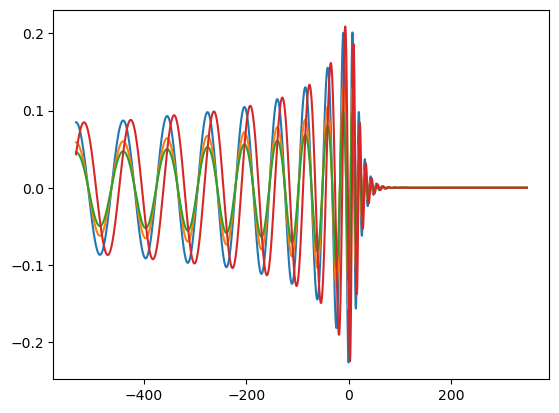

In [ ]:
plt.plot(rwf.time, rwf.get_polarizations(np.pi / 6, 0))
plt.plot(rwf.time, rwf.get_polarizations(np.pi / 3, 0))
plt.plot(rwf.time, rwf.get_polarizations(np.pi / 2, 0))
plt.plot(rwf.time, rwf.get_polarizations(np.pi / 6, np.pi / 6))

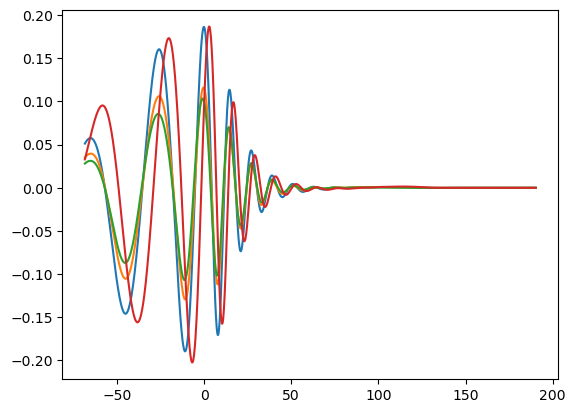

In [ ]:
plt.plot(mwf.time, mwf.get_polarizations(np.pi / 6, 0))
plt.plot(mwf.time, mwf.get_polarizations(np.pi / 3, 0))
plt.plot(mwf.time, mwf.get_polarizations(np.pi / 2, 0))
plt.plot(mwf.time, mwf.get_polarizations(np.pi / 6, np.pi / 6))

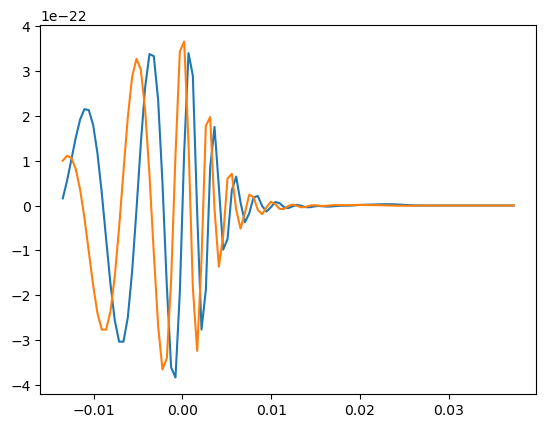

In [ ]:
hpc = mwf.get_td_waveform(
    total_mass=40,
    distance=1000.0,
    inclination=np.pi / 6,
    coa_phase=np.pi / 4,
    delta_t=1.0 / 2048,
)
hp, hc = hpc.real(), hpc.imag()
plt.plot(hp.sample_times, hp)
plt.plot(hc.sample_times, hc)

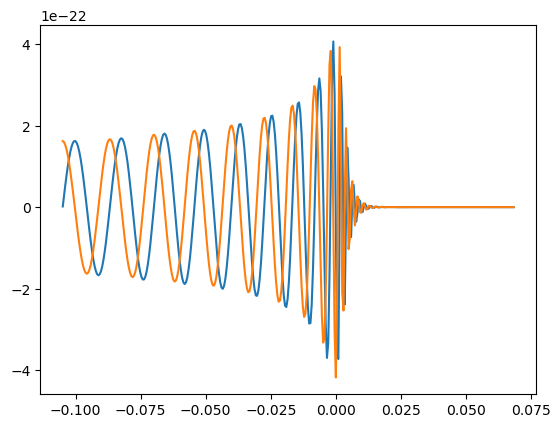

In [ ]:
hpc = rwf.get_td_waveform(
    total_mass=40,
    distance=1000.0,
    inclination=np.pi / 6,
    coa_phase=np.pi / 4,
    delta_t=1.0 / 2048,
)
hp, hc = hpc.real(), hpc.imag()
plt.plot(hp.sample_times, hp)
plt.plot(hc.sample_times, hc)

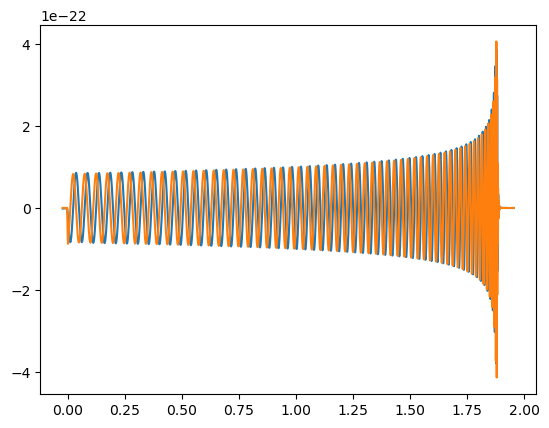

In [ ]:
hpc = swf.get_td_waveform(
    total_mass=40,
    distance=1000.0,
    inclination=np.pi / 6,
    coa_phase=np.pi / 4,
    delta_t=1.0 / 2048,
)
hp, hc = hpc.real(), hpc.imag()
plt.plot(hp.sample_times, hp)
plt.plot(hc.sample_times, hc)

In [ ]:
from nrcatalogtools.waveform import WaveformModes

In [ ]:
type(rwf) == WaveformModes

True

In [ ]:
newf = WaveformModes(rwf.data, rwf.time)

In [ ]:
newf.get_mode(2, 1)

array([[-5.32750000e+02, -5.82188926e-17, -2.09534621e-18],
       [-5.32500000e+02, -5.96136537e-17, -2.06759459e-18],
       [-5.32250000e+02, -6.10007697e-17, -2.04743540e-18],
       ...,
       [ 3.47750000e+02, -7.23538504e-18,  4.65415462e-33],
       [ 3.48000000e+02, -3.62788145e-18, -4.11078069e-33],
       [ 3.48250000e+02,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
newf.view()

WaveformModes([[ 1.54072404e-01+3.51391549e-04j, -6.83134487e-17+1.15011899e-18j,
         5.06394859e-06+3.66229411e-17j, ...,
         1.41533043e-04-3.89219790e-06j, -1.86872384e-18-1.24845250e-18j,
        -2.85732231e-03-3.35382373e-05j],
       [ 1.54035617e-01+2.90580411e-03j, -6.95991189e-17+1.21661681e-18j,
         5.07226651e-06+3.72679899e-17j, ...,
         1.41396776e-04-6.21504943e-06j, -1.86641568e-18-1.26277082e-18j,
        -2.85752330e-03+6.11755740e-05j],
       [ 1.53956567e-01+5.45978223e-03j, -7.08775546e-17+1.29800105e-18j,
         5.07398071e-06+2.18758405e-17j, ...,
         1.41224160e-04-8.53346171e-06j, -1.86348064e-18-1.27783348e-18j,
        -2.85457273e-03+1.55861614e-04j],
       ...,
       [ 2.01542808e-14-9.87275020e-29j, -7.08866190e-18-1.73622142e-33j,
         1.16807527e-12-2.86095929e-28j, ...,
        -6.56351847e-12+2.05853846e-25j, -3.47150328e-20+3.06184259e-34j,
         9.76707315e-13-1.64646773e-25j],
       [ 1.03432296e-14+9.63189211e-

### Waveform Modes

In [ ]:
file_name = "/home/prayush/.cache/RIT/data/ExtrapStrain_RIT-BBH-0940-n100.h5"
hf = h5py.File(file_name)

In [ ]:
file_str, root_group = file_name.rsplit(".h5", 1)

In [ ]:
sw = sxs.load("SXS:BBH:1599/Lev/rhOverM_Asymptotic_GeometricUnits.h5")
sm = sw["Extrapolated_N2.dir"]

Found the following files to load from the SXS catalog:
    SXS:BBH:1599v4/Lev3/rhOverM_Asymptotic_GeometricUnits.h5


100%|██████████| 87.8M/87.8M [01:22<00:00, 1.12MB/s]
/home/prayush/miniconda3/envs/lalsuite-dev-sxs/lib/python3.10/site-packages/sxs/waveforms/nrar.py:176: UserWarning: 
Could not find root group as `h5_group` or as `extrapolation_order`; returning all groups
  warnings.warn(warning)


In [ ]:
sm.frame

quaternionic.array([[1., 0., 0., 0.]])

In [ ]:
sfile = h5py.File(
    "/home/prayush/.cache/sxs/SXS:BBH:1599v1/Lev3/rhOverM_Asymptotic_GeometricUnits.h5"
)

In [ ]:
sf = sfile["Extrapolated_N2.dir"]

In [ ]:
for a in sf.attrs:
    print(a)

DataType
FrameType
MIsScaledOut
OutputFormatVersion
RIsScaledOut


In [ ]:
sm.frame

quaternionic.array([[1., 0., 0., 0.]])

In [ ]:
mym = WaveformModes.load_from_h5(
    "/home/prayush/.cache/RIT/data/ExtrapStrain_RIT-eBBH-1283-n100.h5"
)

/home/prayush/miniconda3/envs/lalsuite-dev-sxs/lib/python3.10/site-packages/nrcatalogtools-0.0.1-py3.10.egg/nrcatalogtools/waveform.py:136: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stat_mode(np.diff(amp_time))[0][0],
/home/prayush/miniconda3/envs/lalsuite-dev-sxs/lib/python3.10/site-packages/nrcatalogtools-0.0.1-py3.10.egg/nrcatalogtools/waveform.py:137: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the

/home/prayush/miniconda3/envs/lalsuite-dev-sxs/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


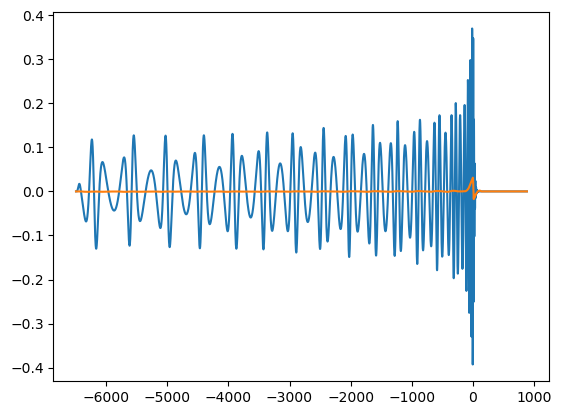

In [ ]:
plt.plot(mym.time, mym.data[:, 0])
# plt.plot(mym.time, mym.data[:, 1])
plt.plot(mym.time, mym.data[:, 2])
# plt.plot(mym.time, mym.data[:, 3])

In [ ]:
swsh_h = mym.get_td_waveform(
    total_mass=20, distance=100, inclination=np.pi / 6, coa_phase=0, delta_t=1.0 / 2048
)

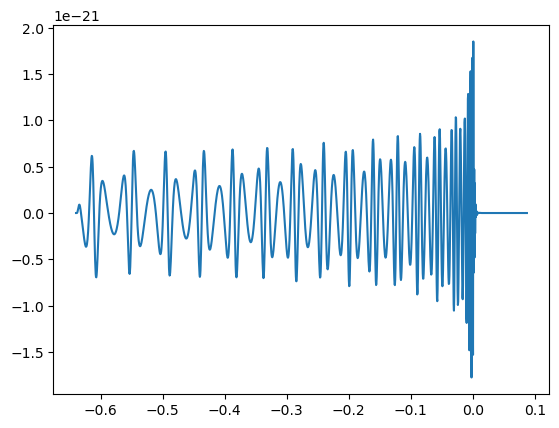

In [ ]:
plt.plot(swsh_h.t, swsh_h)

In [ ]:
swsh_ts = mym.to_pycbc(swsh_h)

/home/prayush/miniconda3/envs/lalsuite-dev-sxs/lib/python3.10/site-packages/nrcatalogtools-0.0.1-py3.10.egg/nrcatalogtools/waveform.py:213: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  delta_t = stat_mode(np.diff(input_array.time))[0][0]


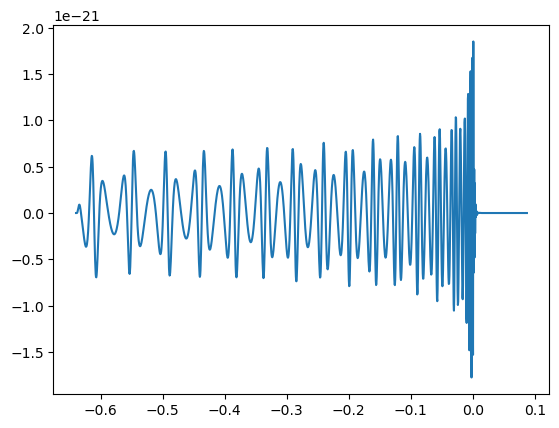

In [ ]:
plt.plot(swsh_ts.sample_times, swsh_ts)

In [ ]:
mym.shape[: mym.modes_axis]

(22151,)

In [ ]:
import quaternionic, spherical

R = quaternionic.array.from_spherical_coordinates(np.pi / 6, 0)
Rflat = R.ndarray.reshape(-1, 4)
signal_shape = list(mym.shape)
signal_shape[mym.modes_axis] = Rflat.shape[0]
print(signal_shape)
signal = np.zeros(tuple(signal_shape), dtype=complex)
slices = [slice(None) for _ in range(signal.ndim)]

[22151, 1]


In [ ]:
wigner = spherical.Wigner(mym.ell_max, ell_min=mym.ell_min, mp_max=abs(mym.spin_weight))

In [ ]:
sYlm = np.empty(wigner.Ysize, dtype=complex)
wigner.sYlm(mym.spin_weight, Rflat[0], out=sYlm)

array([ 0.00283051+0.j,  0.02112723+0.j,  0.09656855+0.j,  0.29426434+0.j,
        0.54910473+0.j,  0.0020509 +0.j,  0.01539945+0.j,  0.07110775+0.j,
        0.22126635+0.j,  0.43988499+0.j,  0.38857578+0.j, -0.39786417+0.j,
        0.00125592+0.j,  0.00970497+0.j,  0.04675587+0.j,  0.15595675+0.j,
        0.35543098+0.j,  0.47985751+0.j,  0.13836884+0.j, -0.50447156+0.j,
        0.24364105+0.j,  0.0007186 +0.j,  0.00575386+0.j,  0.02910601+0.j,
        0.10429008+0.j,  0.26727262+0.j,  0.45866091+0.j,  0.40264451+0.j,
       -0.12961057+0.j, -0.46326193+0.j,  0.41088166+0.j, -0.13940462+0.j])

In [ ]:
new_time = np.arange(min(mym.time), max(mym.time), 1)
new_h = mym.interpolate(new_time)

In [ ]:
h = new_h.evaluate([np.pi / 6, 0])

/home/prayush/miniconda3/envs/lalsuite-dev-sxs/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


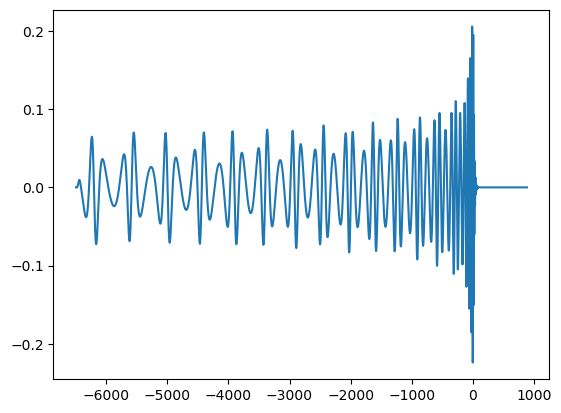

In [ ]:
plt.plot(h.time, h)

In [ ]:
h.ndarray.max()

(0.20583207319134+0.007728661326147041j)

In [ ]:
lalsim.SimInspiralNRWaveformGetSpinsFromHDF5File

In [ ]:
for row in wc.simulations_dataframe["waveform_data_location"]:
    print(os.path.basename(row))

ExtrapStrain_RIT-BBH-0001-n100.h5
ExtrapStrain_RIT-BBH-0002-n100.h5
ExtrapStrain_RIT-BBH-0003-n100.h5
ExtrapStrain_RIT-BBH-0004-n100.h5
ExtrapStrain_RIT-BBH-0005-n100.h5
ExtrapStrain_RIT-BBH-0006-n100.h5
ExtrapStrain_RIT-BBH-0007-n100.h5
ExtrapStrain_RIT-BBH-0008-n100.h5
ExtrapStrain_RIT-BBH-0009-n100.h5
ExtrapStrain_RIT-BBH-0010-n100.h5
ExtrapStrain_RIT-BBH-0011-n100.h5
ExtrapStrain_RIT-BBH-0012-n100.h5
ExtrapStrain_RIT-BBH-0013-n100.h5
ExtrapStrain_RIT-BBH-0014-n120.h5
ExtrapStrain_RIT-BBH-0015-n100.h5
ExtrapStrain_RIT-BBH-0016-n120.h5
ExtrapStrain_RIT-BBH-0017-n100.h5
ExtrapStrain_RIT-BBH-0018-n120.h5
ExtrapStrain_RIT-BBH-0019-n100.h5
ExtrapStrain_RIT-BBH-0020-n100.h5
ExtrapStrain_RIT-BBH-0021-n100.h5
ExtrapStrain_RIT-BBH-0022-n100.h5
ExtrapStrain_RIT-BBH-0023-n100.h5
ExtrapStrain_RIT-BBH-0024-n100.h5
ExtrapStrain_RIT-BBH-0025-n100.h5
ExtrapStrain_RIT-BBH-0026-n100.h5
ExtrapStrain_RIT-BBH-0027-n100.h5
ExtrapStrain_RIT-BBH-0028-n100.h5
ExtrapStrain_RIT-BBH-0029-n100.h5
ExtrapStrain_R

In [ ]:
wc.files

{'ExtrapStrain_RIT-BBH-0001-n100.h5': {'checksum': None,
  'filename': 'ExtrapStrain_RIT-BBH-0001-n100.h5',
  'filesize': 865342,
  'download': 'https://ccrgpages.rit.edu/~RITCatalog//Data//ExtrapStrain_RIT-BBH-0001-n100.h5',
  'truepath': 'ExtrapStrain_RIT-BBH-0001-n100.h5'},
 'ExtrapStrain_RIT-BBH-0002-n100.h5': {'checksum': None,
  'filename': 'ExtrapStrain_RIT-BBH-0002-n100.h5',
  'filesize': 1055601,
  'download': 'https://ccrgpages.rit.edu/~RITCatalog//Data//ExtrapStrain_RIT-BBH-0002-n100.h5',
  'truepath': 'ExtrapStrain_RIT-BBH-0002-n100.h5'},
 'ExtrapStrain_RIT-BBH-0003-n100.h5': {'checksum': None,
  'filename': 'ExtrapStrain_RIT-BBH-0003-n100.h5',
  'filesize': 1079292,
  'download': 'https://ccrgpages.rit.edu/~RITCatalog//Data//ExtrapStrain_RIT-BBH-0003-n100.h5',
  'truepath': 'ExtrapStrain_RIT-BBH-0003-n100.h5'},
 'ExtrapStrain_RIT-BBH-0004-n100.h5': {'checksum': None,
  'filename': 'ExtrapStrain_RIT-BBH-0004-n100.h5',
  'filesize': 995917,
  'download': 'https://ccrgpages.r

In [ ]:
class test(obj):
    def __init__(self):
        return
    
    @classmethod
    

In [ ]:
?sxs.utilities.downloads.download_file

Signature:
sxs.utilities.downloads.download_file(
    url,
    path,
    progress=False,
    if_newer=True,
)
Docstring:
Download large file efficiently from url into path

Parameters
----------
url : str
    The URL to download from.  Redirects are followed.
path : {str, pathlib.Path}
    Path to the file in which the download will be stored.  If this is an
    existing directory or ends in a path separator, the "path" component of the
    URL will be used as the file name, and the full directory path will be
    created.
progress : bool, optional
    If True, and a nonzero Content-Length header is returned, a progress bar
    will be shown during the download.
if_newer : {bool, datetime, pathlib.Path}, optional
    If True (the default), the file will only be downloaded if the version on
    the server is newer than the "mtime" of the local version.  If this flag is
    False, or there is no local version, or the server does not reply with a
    'Last-Modified' header, the file is do

In [ ]:
rc = RITCatalog.load()

TypeError: RITCatalog.read_metadata_df_from_disk() missing 1 required positional argument: 'self'

In [ ]:
sx = Catalog.load()

In [ ]:
sx

In [ ]:
import time


def myfunc(a, b):
    print(a, b)
    time.sleep(int(b))
    return [[a + b + a * b]]


try:
    res = call_with_timeout(myfunc, args=(2, 1), timeout=5)
    print(res)
except:
    print("TIMED OUT, as expected.")

2 1
[[5]]


In [ ]:
rc = RITCatalog.load()

LOADING?


In [ ]:
sc._dict.keys()

dict_keys(['catalog_file_description', 'modified', 'records', 'simulations'])

In [ ]:
sc._dict["simulations"].keys()

dict_keys(['SXS:BBH:0001', 'SXS:BBH:0002', 'SXS:BBH:0003', 'SXS:BBH:0004', 'SXS:BBH:0005', 'SXS:BBH:0006', 'SXS:BBH:0007', 'SXS:BBH:0008', 'SXS:BBH:0009', 'SXS:BBH:0010', 'SXS:BBH:0011', 'SXS:BBH:0012', 'SXS:BBH:0013', 'SXS:BBH:0014', 'SXS:BBH:0015', 'SXS:BBH:0016', 'SXS:BBH:0017', 'SXS:BBH:0018', 'SXS:BBH:0019', 'SXS:BBH:0020', 'SXS:BBH:0021', 'SXS:BBH:0022', 'SXS:BBH:0023', 'SXS:BBH:0024', 'SXS:BBH:0025', 'SXS:BBH:0026', 'SXS:BBH:0027', 'SXS:BBH:0028', 'SXS:BBH:0029', 'SXS:BBH:0030', 'SXS:BBH:0031', 'SXS:BBH:0032', 'SXS:BBH:0033', 'SXS:BBH:0034', 'SXS:BBH:0035', 'SXS:BBH:0036', 'SXS:BBH:0037', 'SXS:BBH:0038', 'SXS:BBH:0039', 'SXS:BBH:0040', 'SXS:BBH:0041', 'SXS:BBH:0042', 'SXS:BBH:0043', 'SXS:BBH:0044', 'SXS:BBH:0045', 'SXS:BBH:0046', 'SXS:BBH:0047', 'SXS:BBH:0048', 'SXS:BBH:0049', 'SXS:BBH:0050', 'SXS:BBH:0051', 'SXS:BBH:0052', 'SXS:BBH:0053', 'SXS:BBH:0054', 'SXS:BBH:0055', 'SXS:BBH:0056', 'SXS:BBH:0057', 'SXS:BBH:0058', 'SXS:BBH:0059', 'SXS:BBH:0060', 'SXS:BBH:0061', 'SXS:BBH:0062

In [ ]:
sc._dict["simulations"]["SXS:BBH:0001"]

Metadata([('url', 'https://doi.org/10.5281/zenodo.1212426'),
          ('simulation_name', 'd18.0_q1.0_s0_0_0_s0_0_0/Lev5'),
          ('alternative_names', 'SXS:BBH:0001'),
          ('initial_data_type', 'BBH_CFMS'),
          ('object_types', 'BHBH'),
          ('number_of_orbits', 28.1190834141),
          ('reference_mass_ratio', 0.9999999899440033),
          ('reference_chi_eff', 1.2156391861217613e-07),
          ('reference_chi1_perp', 9.733308972643856e-10),
          ('reference_chi2_perp', 1.4299394525915949e-09),
          ('reference_eccentricity', 0.0002569),
          ('reference_dimensionless_spin1',
           [7.09752141352e-10, -6.66051760901e-10, 1.20930921804e-07]),
          ('reference_dimensionless_spin2',
           [5.84453420303e-10, 1.30504445113e-09, 1.22196915414e-07]),
          ('reference_orbital_frequency',
           [2.82808523611e-13, -8.25159171205e-13, 0.0122754056311]),
          ('reference_mass1', 0.500000161328),
          ('reference_mass2',

In [ ]:
from nrcatalogtools.rit import RITCatalog as ritcatalog

In [ ]:
c = RITCatalog(verbosity=5)

TypeError: RITCatalog.load() got an unexpected keyword argument 'verbosity'

In [ ]:
c.metadata_filename_from_simname("RIT:eBBH:1843-n100")

'RIT:eBBH:1843-n100-ecc_Metadata.txt'

In [ ]:
c.sim_info_from_metadata_filename("RIT:eBBH:1843-n100-ecc_Metadata")

(1843, 100, -1)

In [ ]:
c.waveform_filename_from_simname("RIT:BBH:0096-n140-id3")

'ExtrapStrain_RIT-BBH-0096-n140.h5'

In [ ]:
c.download_waveform_data("RIT:BBH:0096-n140-id3")

...can read from cache: /home/prayush/.nr_data/RIT/waveform_data/ExtrapStrain_RIT-BBH-0096-n140.h5


In [ ]:
c.fetch_metadata(1715, 100)

...beginning search for RIT:BBH:1715-n100-id-1_Metadata.txt
...tried and failed to find https://ccrgpages.rit.edu/~RITCatalog//Metadata//RIT:BBH:1715-n100-id-1_Metadata.txt
...beginning search for RIT:eBBH:1715-n100-ecc_Metadata.txt
...reading from cache: /home/prayush/.nr_data/RIT/metadata/RIT:eBBH:1715-n100-ecc_Metadata.txt


catalog-tag resolution-tag id-tag  \
0  RIT:eBBH:1715           n100    ecc   

                                 run-name data-type system-type comments  \
0  D24.64_q1.00_a0.7_ph180_f0.90_opt_n100        NR  Precessing     none   

                                      authors-emails simulation-bibtex-keys  \
0  James Healy <jchsma@rit.edu>, Carlos Lousto <c...                          

    code-bibtex-keys  ... final-mass final-chi peak-omega-22 peak-ampl-22  \
0  Campanelli:2005dd  ...    0.98899  0.133606      0.009327      0.51668   

  peak-luminosity-ergs-per-sec final-kick         simulation_name  \
0                 2.689538e+55      50.58  RIT:eBBH:1715-n100-ecc   

                                       metadata_link  \
0  https://ccrgpages.rit.edu/~RITCatalog//Metadat...   

                                   metadata_location  \
0  /home/prayush/.nr_data/RIT/metadata/RIT:eBBH:1...   

                              waveform_data_location  
0  /home/prayush/.nr_data/RIT/waveform_data/Extra...  

[1 rows x 69 columns]

In [ ]:
c.fetch_metadata_from_cache(1715)

...found no files matching /home/prayush/.nr_data/RIT/metadata/RIT:BBH:1715*
...found no files matching /home/prayush/.nr_data/RIT/metadata/RIT:BBH:1715*


catalog-tag resolution-tag id-tag  \
0  RIT:eBBH:1715           n100    ecc   

                                 run-name data-type system-type comments  \
0  D24.64_q1.00_a0.7_ph180_f0.90_opt_n100        NR  Precessing     none   

                                      authors-emails simulation-bibtex-keys  \
0  James Healy <jchsma@rit.edu>, Carlos Lousto <c...                          

    code-bibtex-keys  ... final-chi peak-omega-22 peak-ampl-22  \
0  Campanelli:2005dd  ...  0.133606      0.009327      0.51668   

  peak-luminosity-ergs-per-sec final-kick         simulation_name  \
0                 2.689538e+55      50.58  RIT:eBBH:1715-n100-ecc   

                                       metadata_link  \
0  https://ccrgpages.rit.edu/~RITCatalog//Metadat...   

                                   metadata_location  \
0  /home/prayush/.nr_data/RIT/metadata/RIT:eBBH:1...   

                                  waveform_data_link  \
0  https://ccrgpages.rit.edu/~RITCatalog//Data//E...   

                              waveform_data_location  
0  /home/prayush/.nr_data/RIT/waveform_data/Extra...  

[1 rows x 70 columns]

In [ ]:
c.download_waveform_data_for_catalog(5)

...can read from cache: /home/prayush/.nr_data/RIT/waveform_data/ExtrapStrain_RIT-BBH-0001-n100.h5
...can read from cache: /home/prayush/.nr_data/RIT/waveform_data/ExtrapStrain_RIT-BBH-0002-n100.h5
...can read from cache: /home/prayush/.nr_data/RIT/waveform_data/ExtrapStrain_RIT-BBH-0003-n100.h5
...can read from cache: /home/prayush/.nr_data/RIT/waveform_data/ExtrapStrain_RIT-BBH-0004-n100.h5
...can read from cache: /home/prayush/.nr_data/RIT/waveform_data/ExtrapStrain_RIT-BBH-0005-n100.h5


{'RIT:BBH:0001-n100-id3': PosixPath('/home/prayush/.nr_data/RIT/waveform_data/ExtrapStrain_RIT-BBH-0001-n100.h5'),
 'RIT:BBH:0002-n100-id0': PosixPath('/home/prayush/.nr_data/RIT/waveform_data/ExtrapStrain_RIT-BBH-0002-n100.h5'),
 'RIT:BBH:0003-n100-id0': PosixPath('/home/prayush/.nr_data/RIT/waveform_data/ExtrapStrain_RIT-BBH-0003-n100.h5'),
 'RIT:BBH:0004-n100-id0': PosixPath('/home/prayush/.nr_data/RIT/waveform_data/ExtrapStrain_RIT-BBH-0004-n100.h5'),
 'RIT:BBH:0005-n100-id0': PosixPath('/home/prayush/.nr_data/RIT/waveform_data/ExtrapStrain_RIT-BBH-0005-n100.h5')}